In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
import numpy as np
from scipy.signal import butter, filtfilt

In [ ]:
import pandas as pd

def read_data(path, classification):
    # Initialize an empty list to store data
    data = []

    with open(path, "r") as file:
        for line in file:
            # Split the line into values, filter out empty strings, and convert to floats
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)

    # Create a DataFrame with a single column 'data' containing arrays
    df = pd.DataFrame({'data': data})

    # Add the classification column
    df['class'] = classification

    return df






In [ ]:
# Example usage
data_pvc_train = read_data('PVC_Train.txt', 1)
data_pvc_train

data  class
0    [0.031147, 0.026147, 0.0061474, 0.0011474, 0.0...      1
1    [-0.24885, -0.27385, -0.30385, -0.30385, -0.29...      1
2    [-0.17885, -0.14885, -0.13885, -0.13385, -0.14...      1
3    [-0.59385, -0.45885, -0.43885, -0.59885, -0.79...      1
4    [-0.52385, -0.35885, -0.18385, -0.093853, -0.0...      1
..                                                 ...    ...
195  [-0.0088526, 0.0011474, -0.018853, -0.038853, ...      1
196  [-0.20885, -0.20885, -0.19385, -0.18385, -0.18...      1
197  [-0.12385, -0.14885, -0.17885, -0.16385, -0.14...      1
198  [-0.41385, -0.39885, -0.40885, -0.38885, -0.40...      1
199  [-0.30885, -0.30385, -0.29385, -0.27885, -0.28...      1

[200 rows x 2 columns]

In [ ]:
len(data_pvc_train['data'][0])

300

In [ ]:
def merge(data1,data2):
    merged_data = pd.concat([data1, data2], ignore_index=True)
    return merged_data

In [ ]:
# # Function to normalize an array to the given range
# def normalize_array(array, normalize_range='0 to 1'):
#     min_value = np.min(array)
#     max_value = np.max(array)
#     if normalize_range == '0 to 1':
#         normalized_array = (array - min_value) / (max_value - min_value)
#     elif normalize_range == '-1 to 1':
#         normalized_array = 2 * ((array - min_value) / (max_value - min_value)) - 1
#     else:
#         raise ValueError("Unsupported normalization range. Use '0 to 1' or '-1 to 1'.")
#     return normalized_array


In [ ]:
# def design_bandpass_filter(f1, f2, fs, transition_band, stop_band_attenuation):
#     nyquist = fs / 2
#     f1_normalized = f1 / nyquist
#     f2_normalized = f2 / nyquist
#     transition_band_normalized = transition_band / nyquist

#     if stop_band_attenuation <= 21:
#         N = int(0.9 / transition_band_normalized)
#     elif stop_band_attenuation <= 44:
#         N = int(3.1 / transition_band_normalized)
#     elif stop_band_attenuation <= 53:
#         N = int(3.3 / transition_band_normalized)
#     elif stop_band_attenuation <= 74:
#         N = int(5.5 / transition_band_normalized)
#     else:
#         raise ValueError("Unsupported stopband attenuation.")
#     N = N if N % 2 == 1 else N + 1  # Ensure N is odd

#     h = []
#     for n in range(N):
#         k = n - (N // 2)
#         if k == 0:
#             h.append(2 * (f2_normalized - f1_normalized))
#         else:
#             term1 = np.sin(2 * np.pi * f2_normalized * k) / (np.pi * k)
#             term2 = np.sin(2 * np.pi * f1_normalized * k) / (np.pi * k)
#             h.append(term1 - term2)

#     hamming_window = [0.54 - 0.46 * np.cos((2 * np.pi * n) / (N - 1)) for n in range(N)]
#     h = [h[i] * hamming_window[i] for i in range(N)]
#     return h

# # Function to apply the filter to an array
# def apply_filter(signal, filter_coefficients):
#     return np.convolve(signal, filter_coefficients, mode='same')

In [ ]:
# for data in data_pvc_train['data']:
#     filtered_signal = apply_filter(data, filter_coefficients)
#     new_Data.append(filtered_signal)


In [ ]:


# # Processing the data
# def process_data(dataframe, fs, f1, f2, transition_band, stop_band_attenuation, normalize_range='0 to 1'):
#     # Design the bandpass filter
#     filter_coefficients = design_bandpass_filter(f1, f2, fs, transition_band, stop_band_attenuation)

#     # Initialize a list to store processed data
#     processed_data = []

#     for data in dataframe['data']:
#         # Normalize the signal
#         normalized_signal = normalize_array(np.array(data), normalize_range)

#         # Apply the bandpass filter
#         filtered_signal = apply_filter(normalized_signal, filter_coefficients)

#         # Append the processed signal
#         processed_data.append(filtered_signal)

#     # Update the dataframe with processed data
#     dataframe['processed_data'] = processed_data
#     return dataframe

# # Example usage
# fs = 300  # Sampling frequency in Hz
# f1 = 0.5  # Lower cutoff frequency in Hz
# f2 = 40   # Upper cutoff frequency in Hz
# transition_band = 20  # Transition band in Hz
# stop_band_attenuation = 44  # Stopband attenuation in dB

# # Read the data

# data_pvc_train = read_data('PVC_Train.txt', 1)

# # Process the data
# processed_data_pvc_train = process_data(data_pvc_train, fs, f1, f2, transition_band, stop_band_attenuation)

# # Display the processed data
# print(processed_data_pvc_train.head())


In [ ]:
# def normalize_data(df):
#     # Normalize each array in 'data' column
#     normalized_data = df['data'].apply(lambda x: normalize([x], axis=1)[0])  # Normalize along each row

#     # Update 'data' column with normalized arrays
#     df['data'] = normalized_data

#     return df

def normalize_row(row, range_min=0, range_max=1):
    """
    Normalize a row of data to a specified range.
    """
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    """
    Test and print normalized data.
    """
    normalized_data = []
    for row in data['data']:
        normalized_row = normalize_row(row)  # Normalize the row
        normalized_data.append(normalized_row)

    # Return a DataFrame with normalized data
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    print("Normalized Data:")
    print(normalized_df)
    return normalized_df

In [ ]:
data_pvc_train = test_normalization(data_pvc_train)


Normalized Data:
                                                  data  class
0    [0.5835034862385322, 0.581668623853211, 0.5743...      1
1    [0.4762058371735791, 0.46852534562211984, 0.45...      1
2    [0.5315615141955836, 0.5410252365930599, 0.544...      1
3    [0.17630853994490361, 0.2506887052341598, 0.26...      1
4    [0.25078369905956105, 0.35423197492163006, 0.4...      1
..                                                 ...    ...
195  [0.5503305477707007, 0.5528783184713375, 0.547...      1
196  [0.4817042253521127, 0.4817042253521127, 0.485...      1
197  [0.46748865355521935, 0.4599243570347958, 0.45...      1
198  [0.060346561682807, 0.06896749906606514, 0.063...      1
199  [0.4716351351351351, 0.4729864864864865, 0.475...      1

[200 rows x 2 columns]


In [ ]:
data_pvc_train


data  class
0    [0.5835034862385322, 0.581668623853211, 0.5743...      1
1    [0.4762058371735791, 0.46852534562211984, 0.45...      1
2    [0.5315615141955836, 0.5410252365930599, 0.544...      1
3    [0.17630853994490361, 0.2506887052341598, 0.26...      1
4    [0.25078369905956105, 0.35423197492163006, 0.4...      1
..                                                 ...    ...
195  [0.5503305477707007, 0.5528783184713375, 0.547...      1
196  [0.4817042253521127, 0.4817042253521127, 0.485...      1
197  [0.46748865355521935, 0.4599243570347958, 0.45...      1
198  [0.060346561682807, 0.06896749906606514, 0.063...      1
199  [0.4716351351351351, 0.4729864864864865, 0.475...      1

[200 rows x 2 columns]

In [ ]:
def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

In [ ]:
def apply_bandpass_filter(signal, b, a):
    # Use filtfilt to apply the filter in a forward and reverse direction to prevent phase distortion
    filtered_signal = filtfilt(b, a, signal)
    return filtered_signal

In [ ]:
def process_data(df, fs, lowcut, highcut):
    # Design the bandpass filter
    b, a = design_bandpass_filter(lowcut, highcut, fs)

    # Apply the filter to each array in 'data' column
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))

    # Update 'data' column with filtered data
    df['data'] = filtered_data

    return df

In [ ]:
fs = 300  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz


In [ ]:
data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)

# Display the processed data
data_pvc_train

data  class
0    [-0.0033883815803731313, -0.007986317900546656...      1
1    [-0.030778044624249122, -0.03798623433607741, ...      1
2    [-0.0018228134755845535, 0.0026507240665441466...      1
3    [-0.05875471966181477, -0.048779937423127195, ...      1
4    [-0.026008619596041414, 0.08087299332653332, 0...      1
..                                                 ...    ...
195  [0.027593054821993628, 0.025023352358068678, 0...      1
196  [-0.012059784139270538, -0.00955622208444785, ...      1
197  [-0.025479017074590358, -0.03152437561875037, ...      1
198  [-0.06512739814388473, -0.060696762845256165, ...      1
199  [-0.023378402943122316, -0.021281583307455384,...      1

[200 rows x 2 columns]

Training KNN...

KNN - Accuracy: 0.9875
KNN - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        44

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



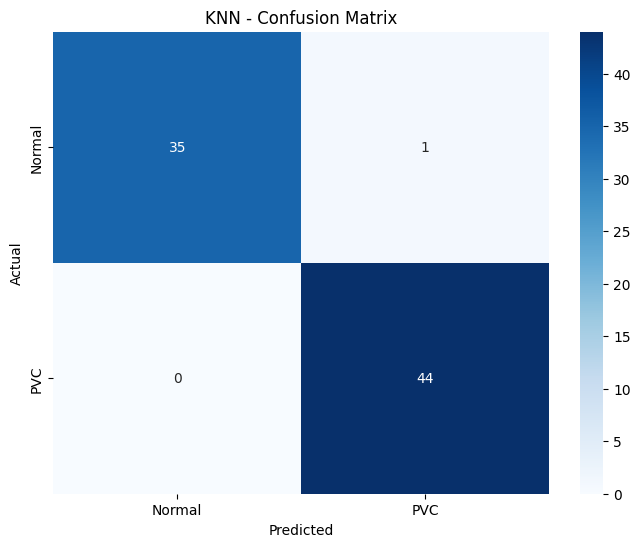

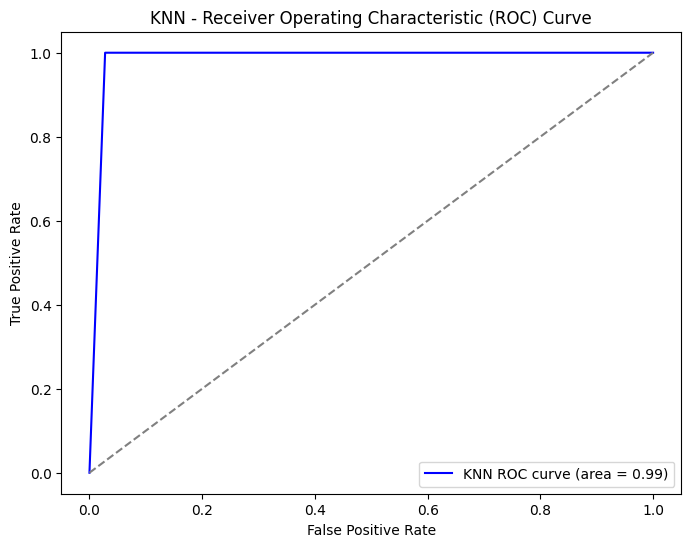

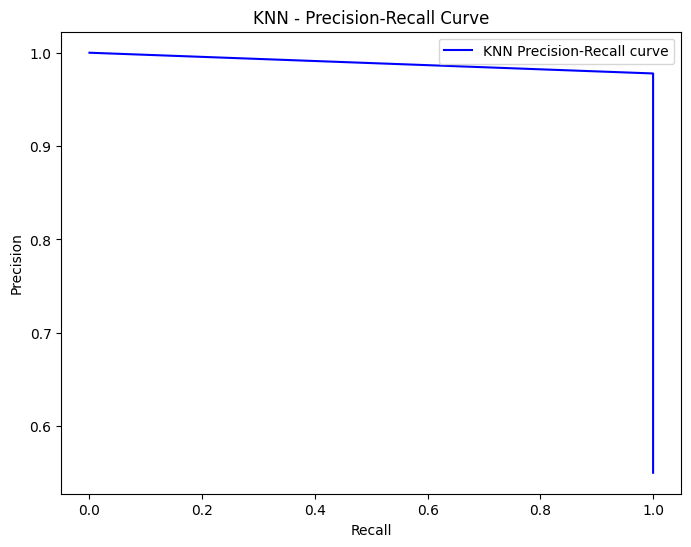

Training Logistic Regression...

Logistic Regression - Accuracy: 1.0
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



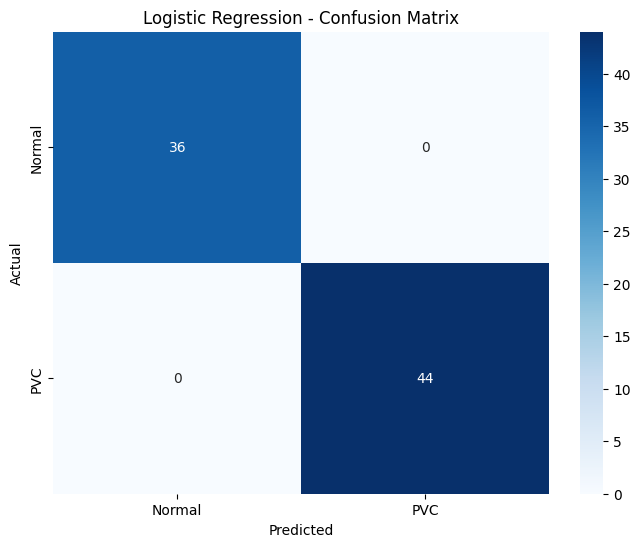

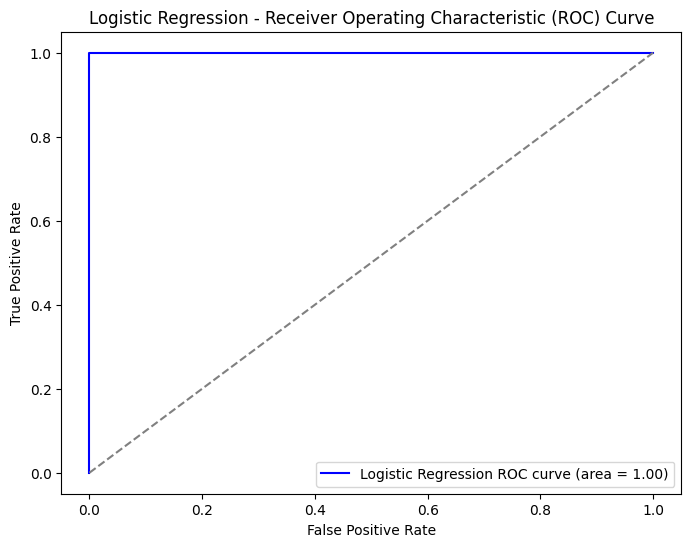

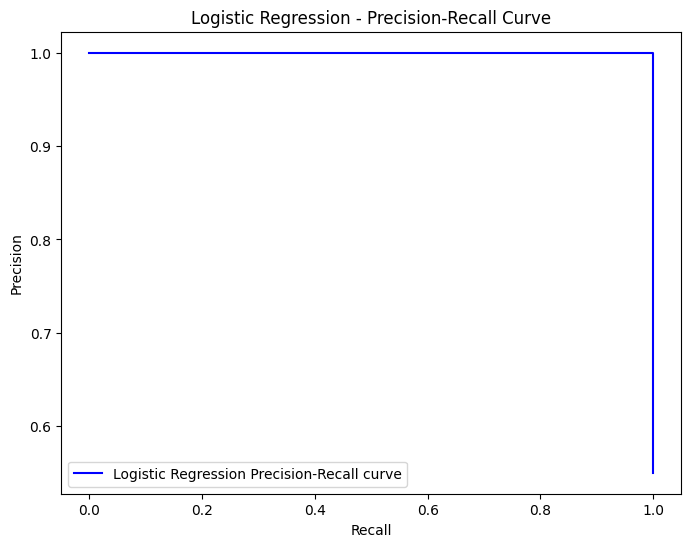

Training Random Forest...

Random Forest - Accuracy: 1.0
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



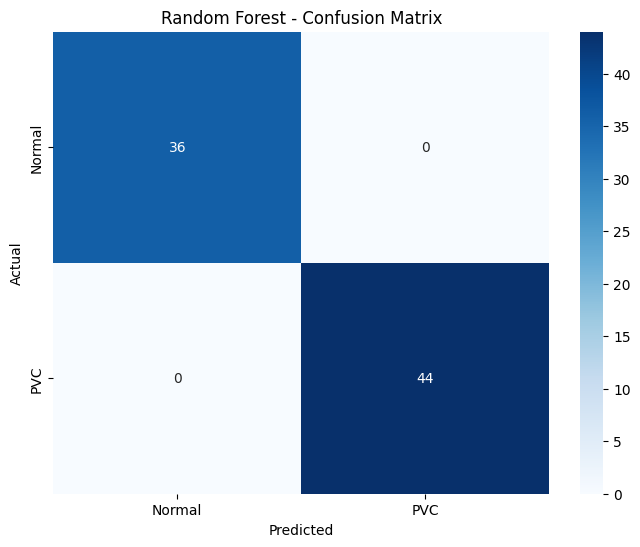

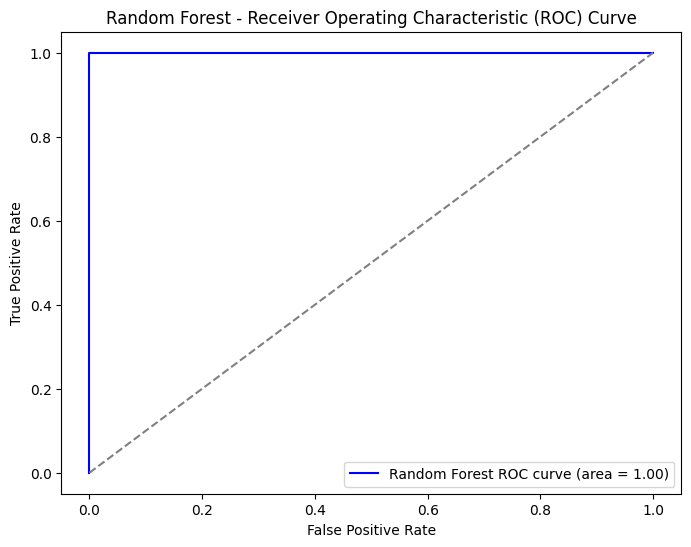

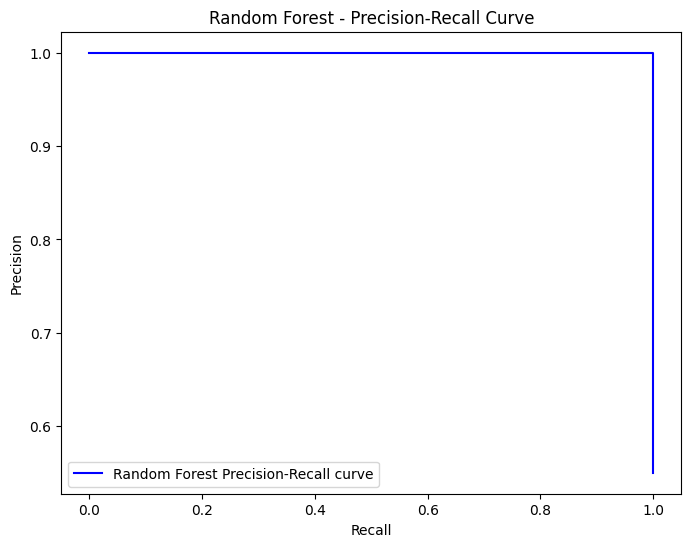

Training SVM...

SVM - Accuracy: 1.0
SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



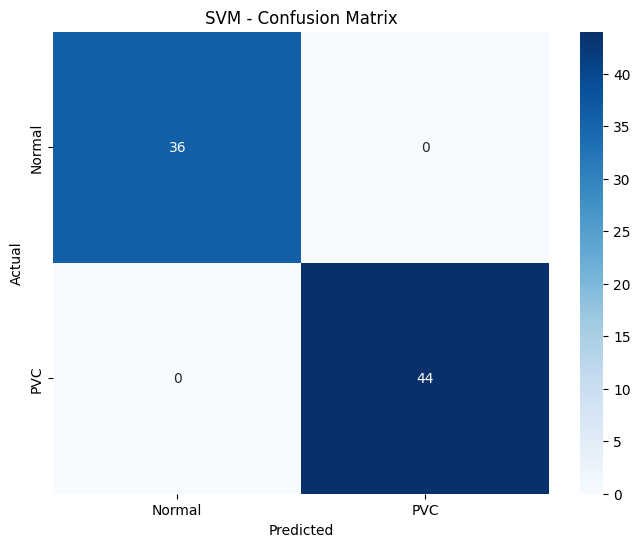

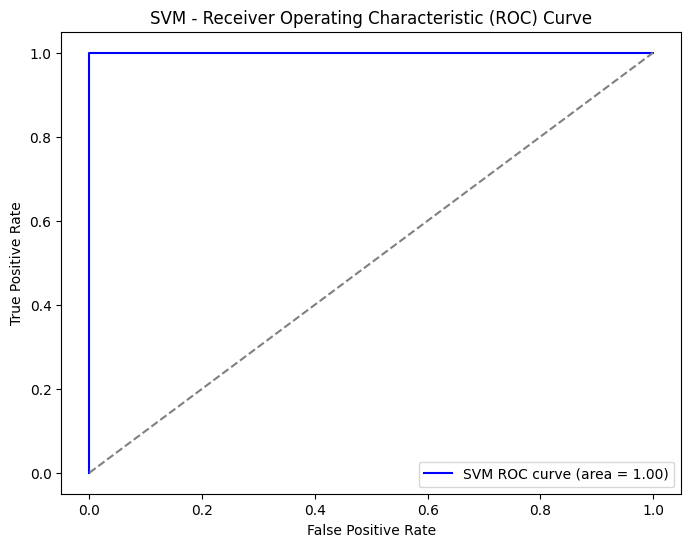

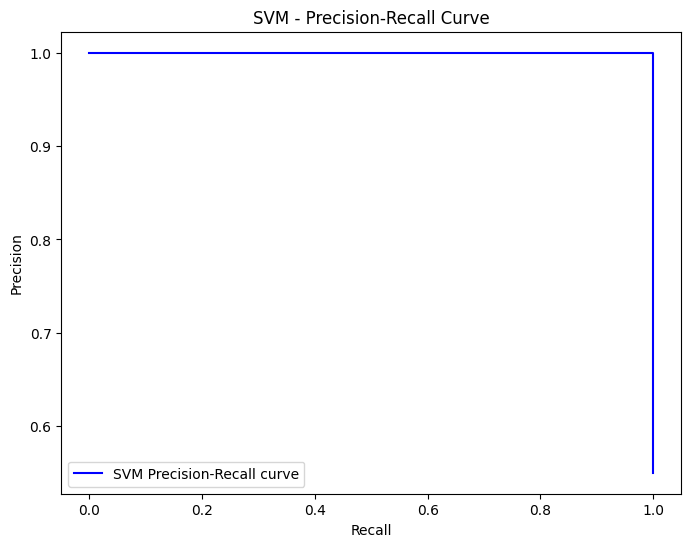

Training Decision Tree...

Decision Tree - Accuracy: 1.0
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



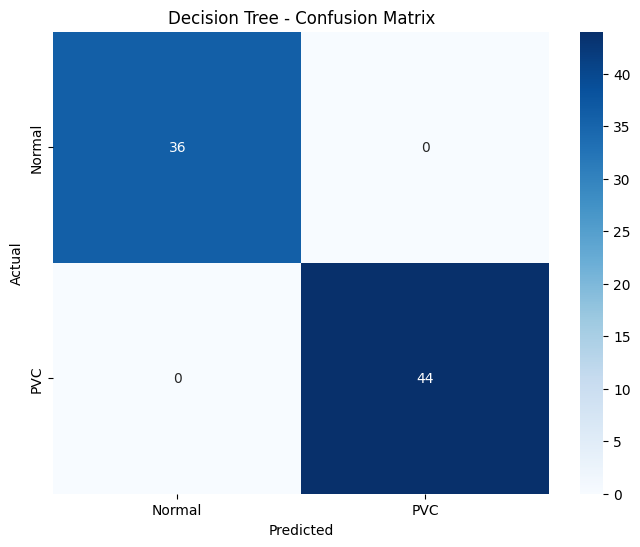

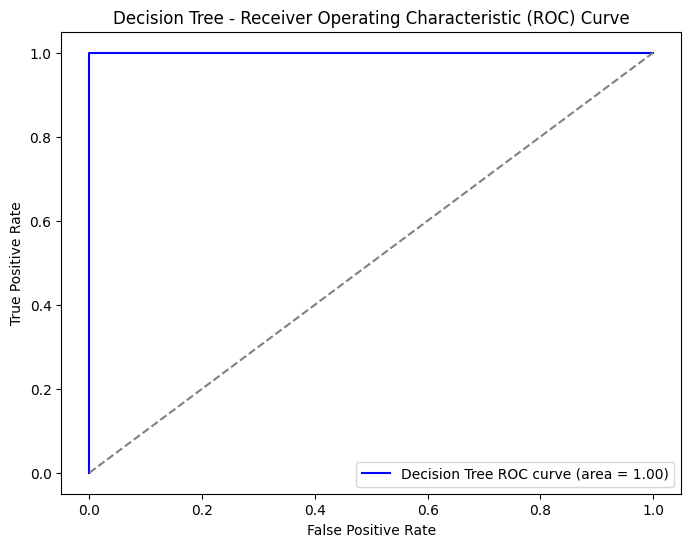

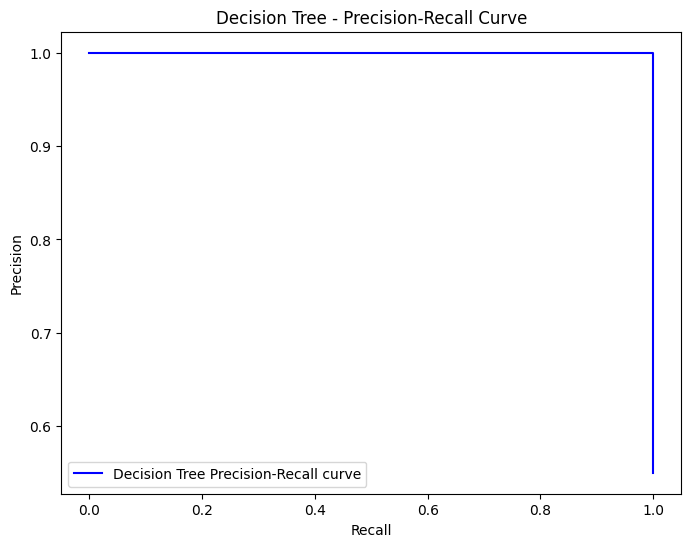

In [8]:
import numpy as np
import pandas as pd
!pip install PyWavelets
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Step 1: Load Data (same as before)
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)
    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Normalize and Filter Data (same as before)
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    normalized_data = [normalize_row(row) for row in data['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    return normalized_df

def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Wavelet Feature Extraction (same as before)
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))  # Mean of coefficients
            row_features.append(np.std(coeff))  # Standard deviation of coefficients
            row_features.append(skew(coeff))  # Skewness of coefficients
            row_features.append(kurtosis(coeff))  # Kurtosis of coefficients
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 5: Load and Process Data (same as before)
fs = 360  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Load the training data for Normal and PVC classes
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with your actual file path
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with your actual file path

# Normalize and process the data
data_pvc_train = test_normalization(data_pvc_train)
data_normal_train = test_normalization(data_normal_train)
data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)
data_normal_train = process_data(data_normal_train, fs, lowcut, highcut)

# Merge the normal and PVC data for training
data_train = pd.concat([data_pvc_train, data_normal_train], ignore_index=True)

# Extract features using wavelet transform
X_train = extract_wavelet_features(data_train)

# Prepare the labels for classification
y_train = data_train['class']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Model Definitions (KNN, Logistic Regression, Random Forest, SVM, Decision Tree)
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 7: Train Models, Predict, and Plot Metrics
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy and Classification Report
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot Confusion Matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'PVC'], yticklabels=['Normal', 'PVC'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=f'{model_name} Precision-Recall curve')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()


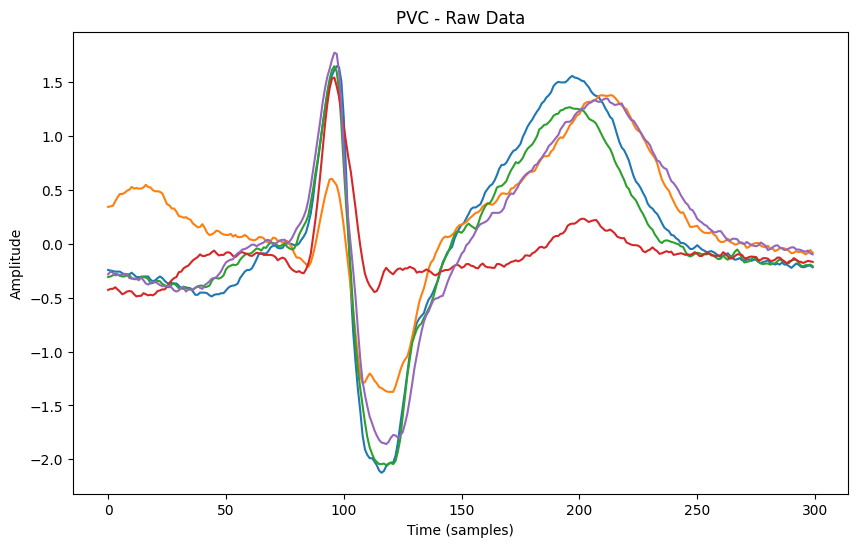

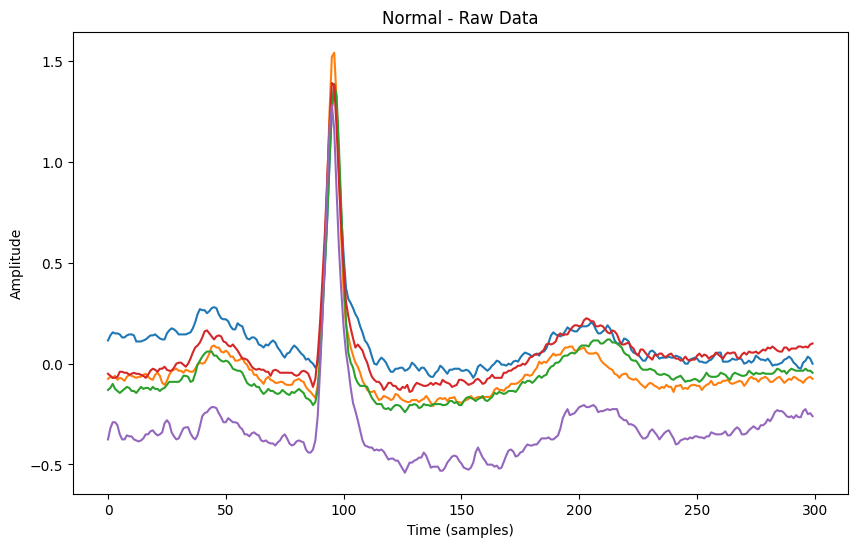

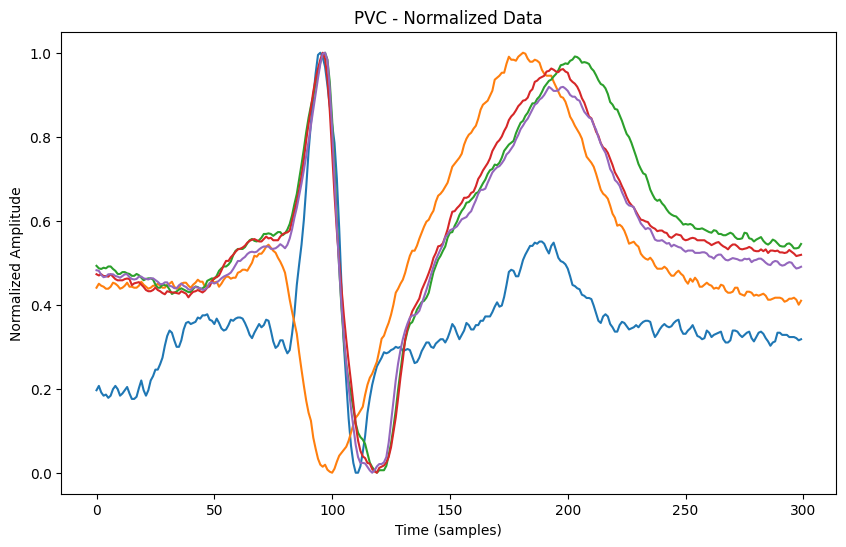

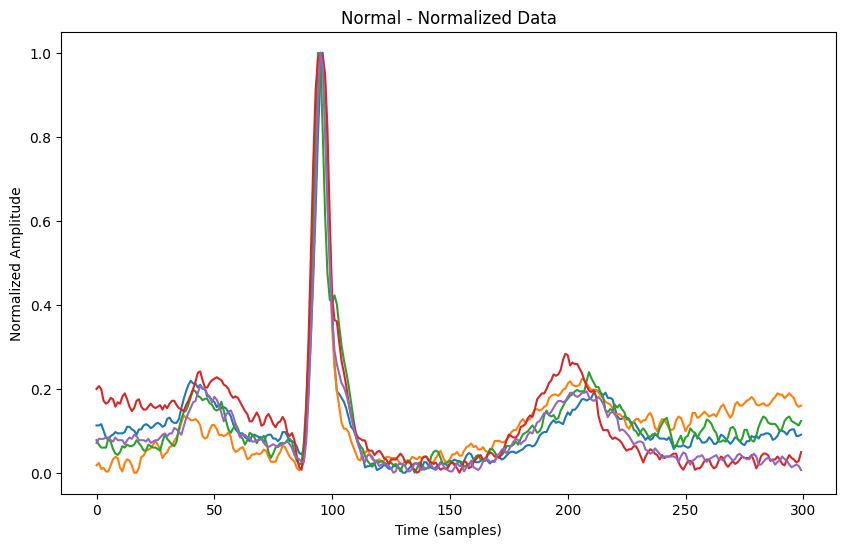

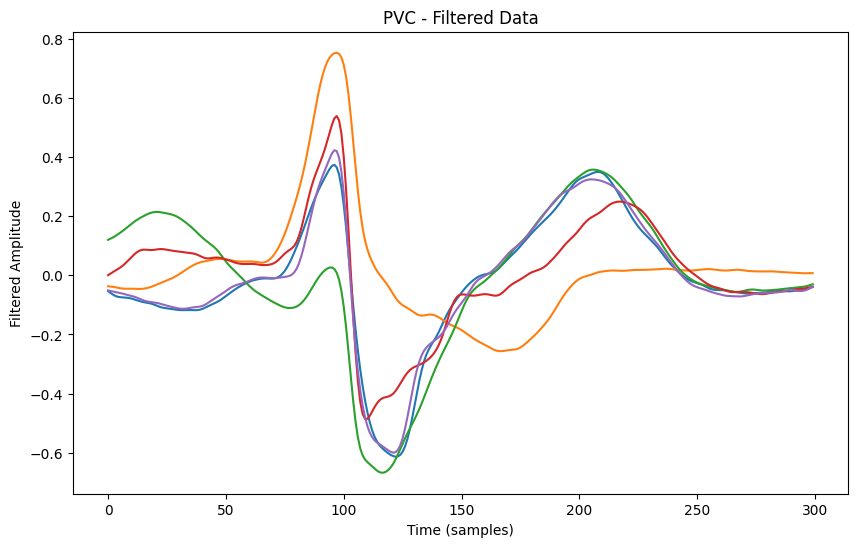

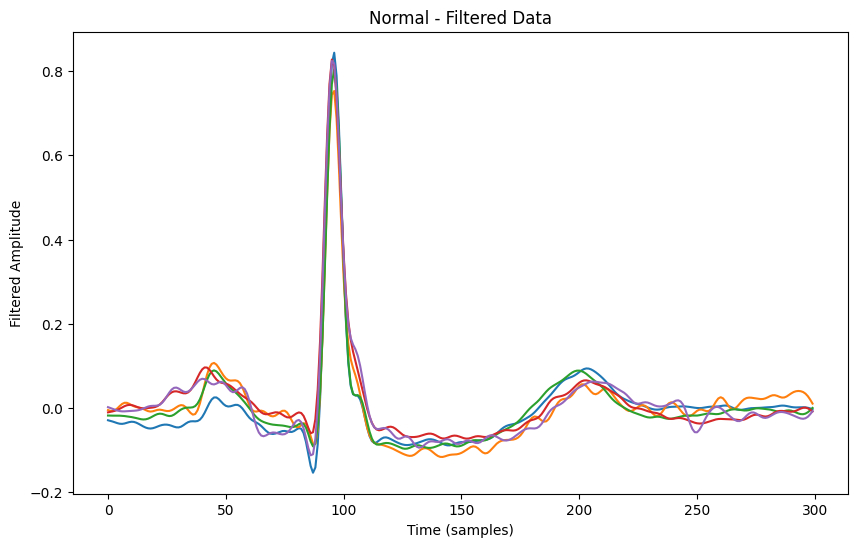

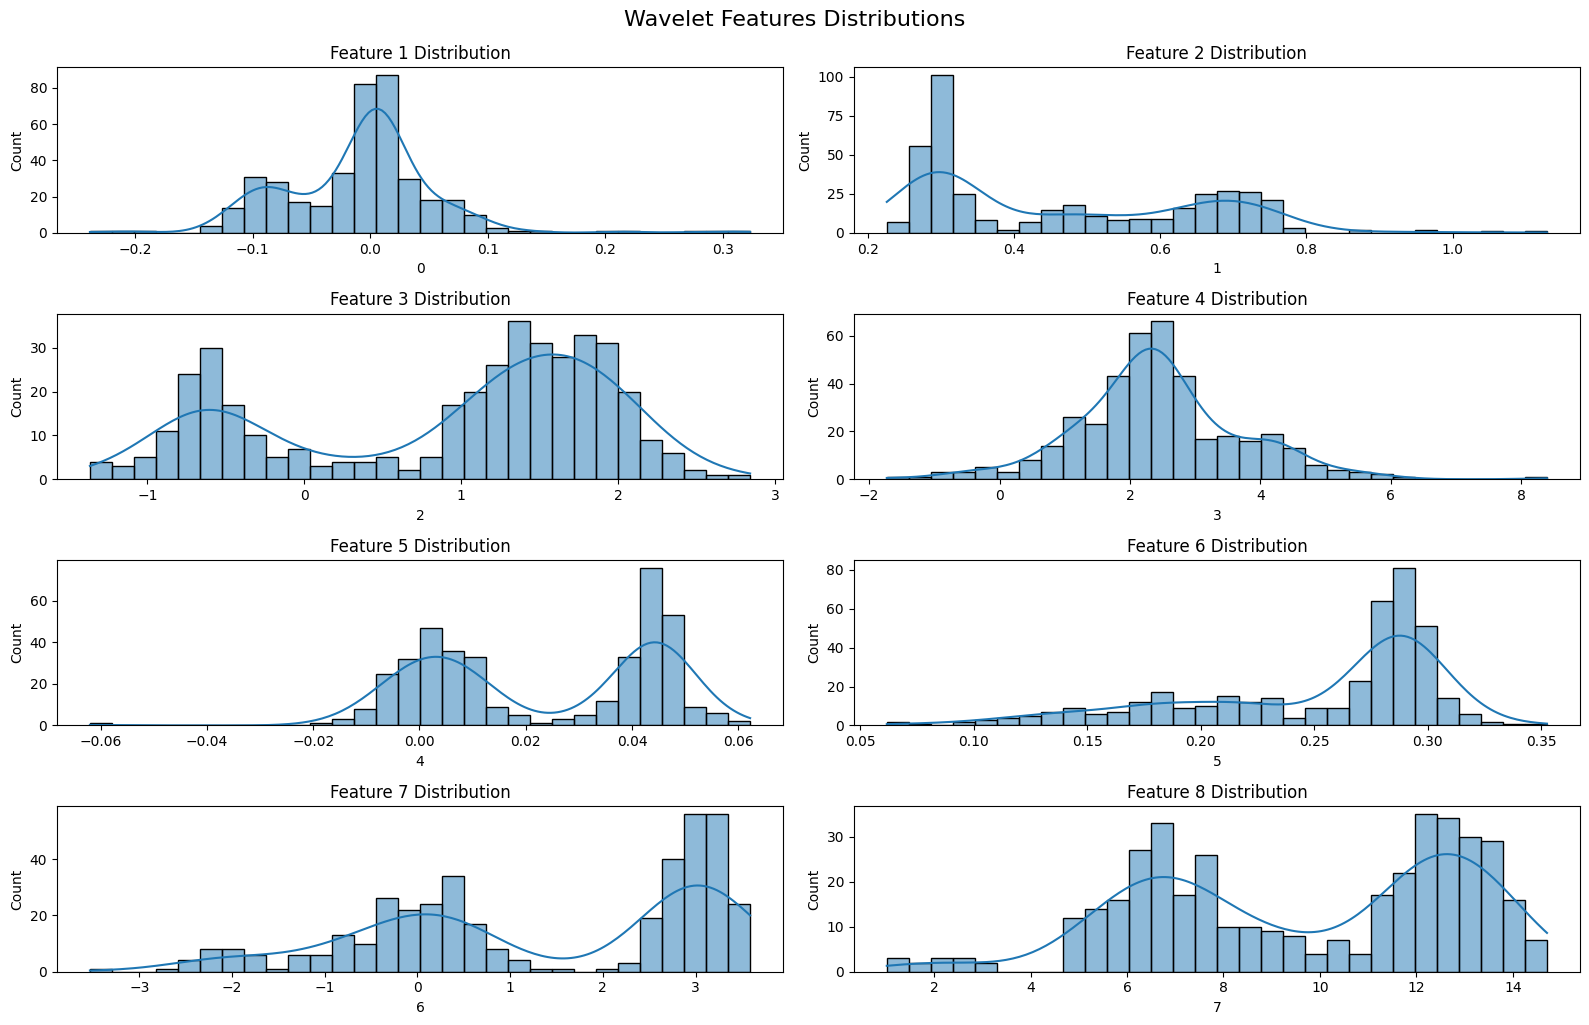

Training KNN...

KNN - Accuracy: 0.9875
KNN - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        44

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



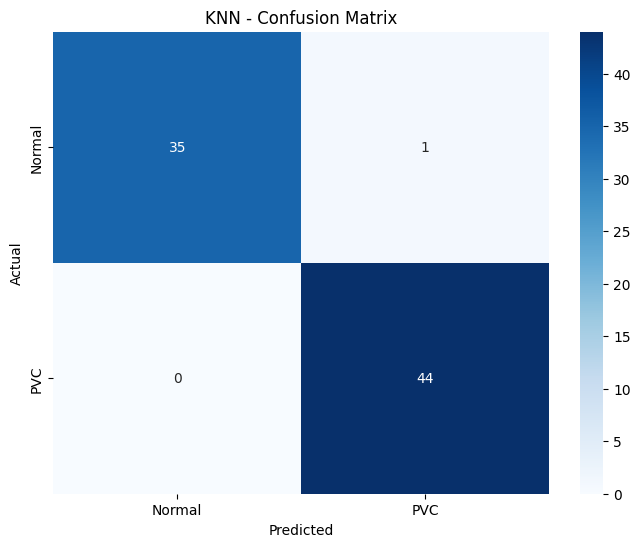

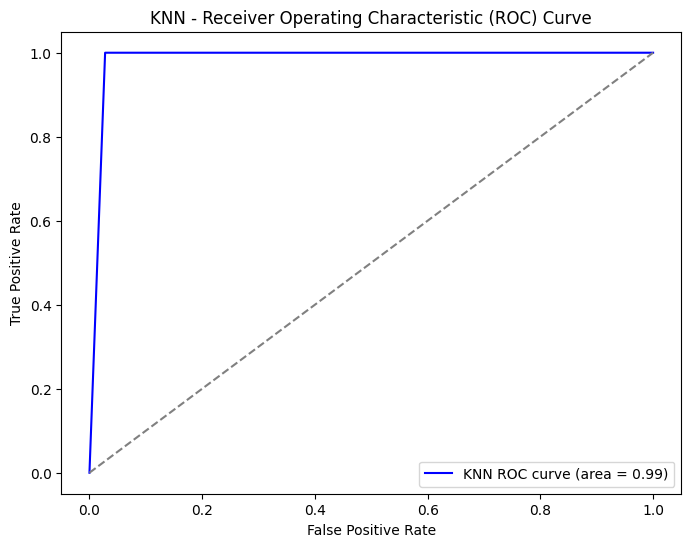

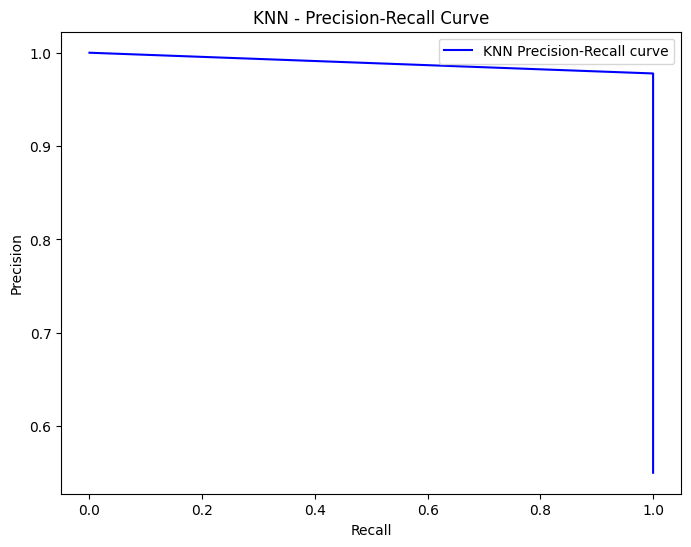

Training Logistic Regression...

Logistic Regression - Accuracy: 1.0
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



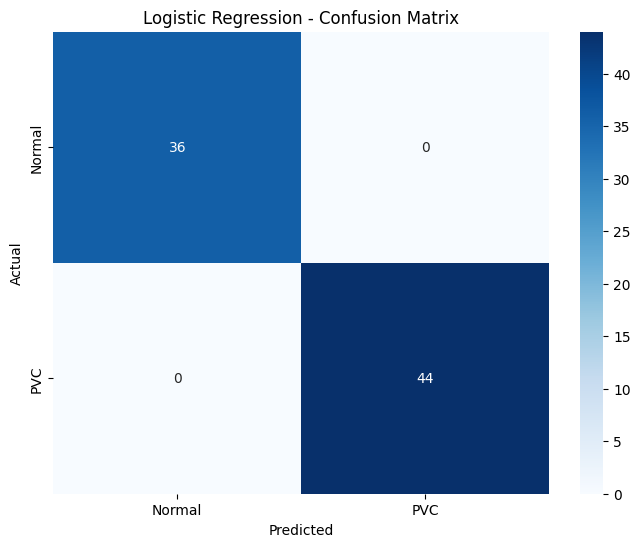

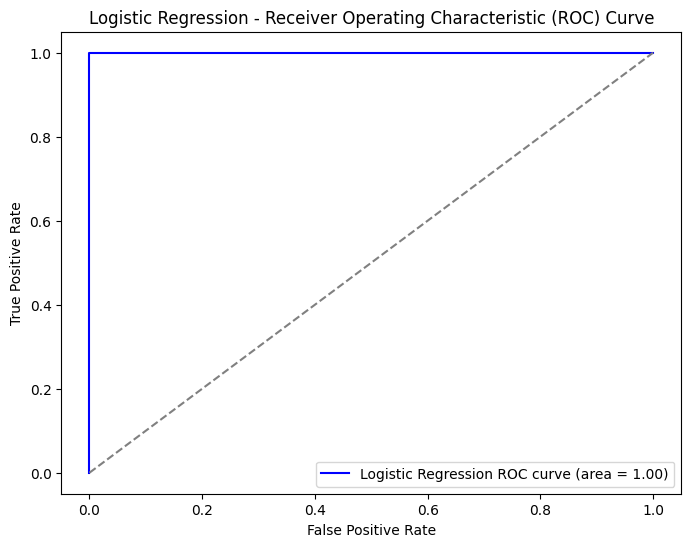

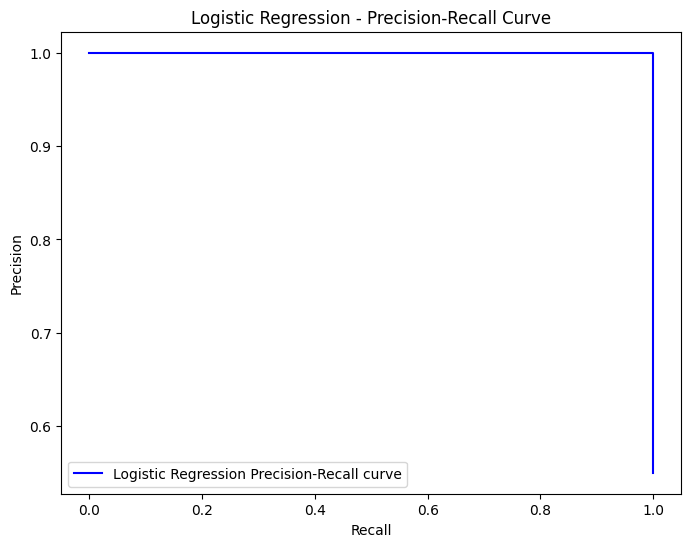

Training Random Forest...

Random Forest - Accuracy: 1.0
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



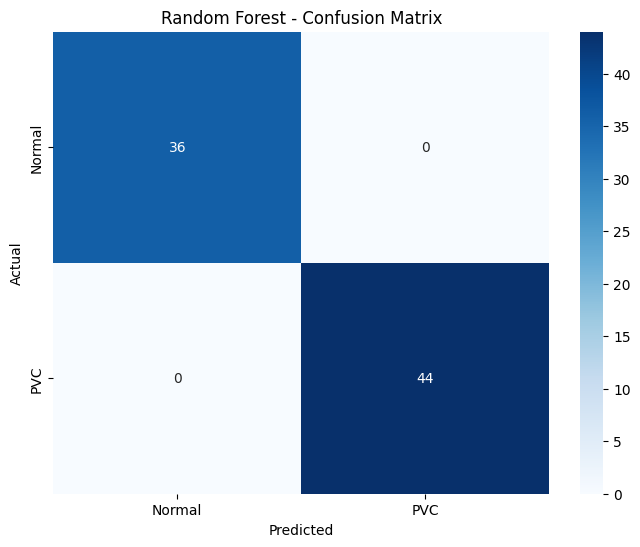

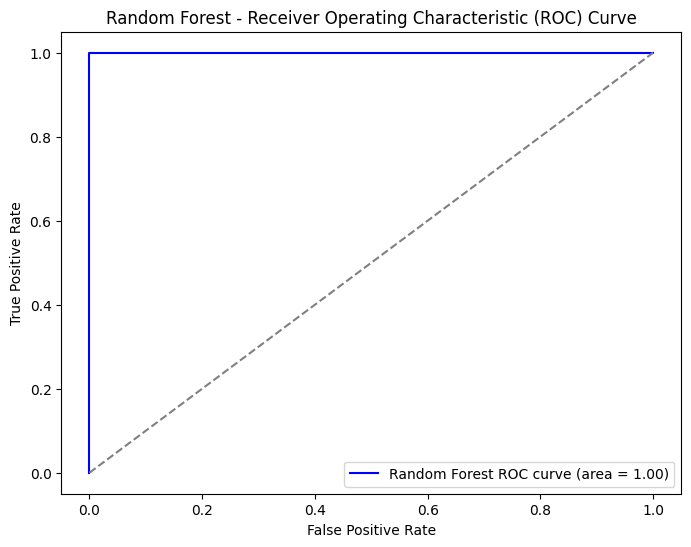

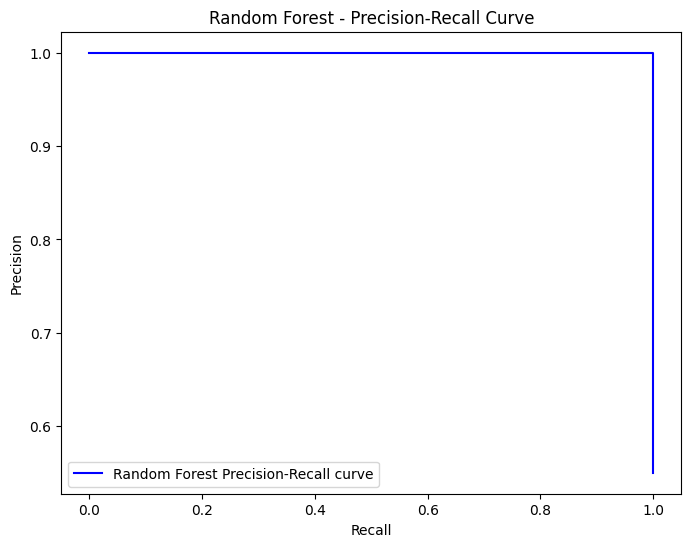

Training SVM...

SVM - Accuracy: 1.0
SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



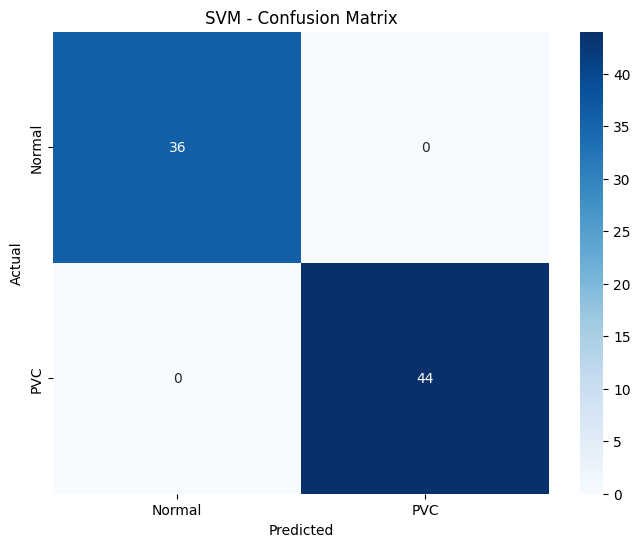

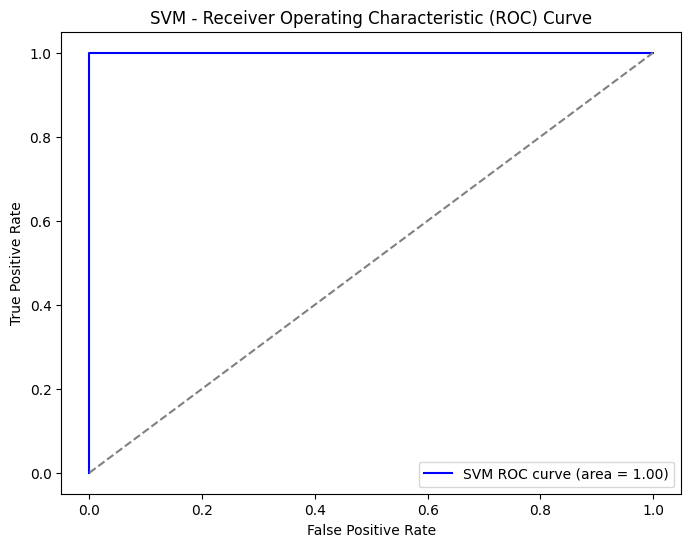

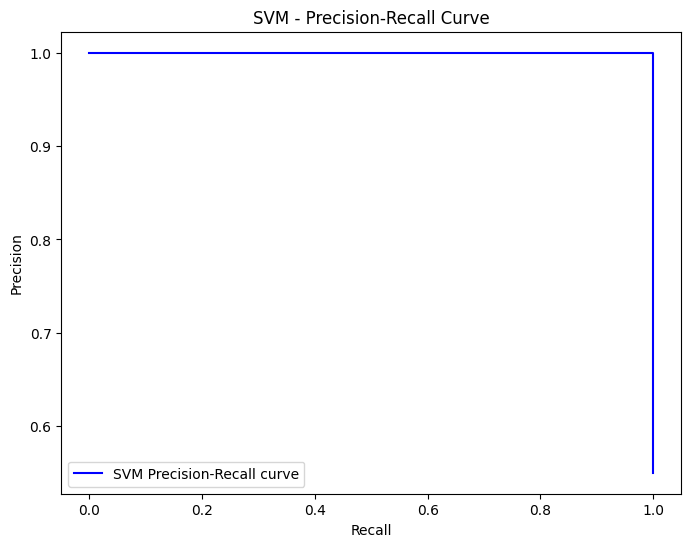

Training Decision Tree...

Decision Tree - Accuracy: 1.0
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



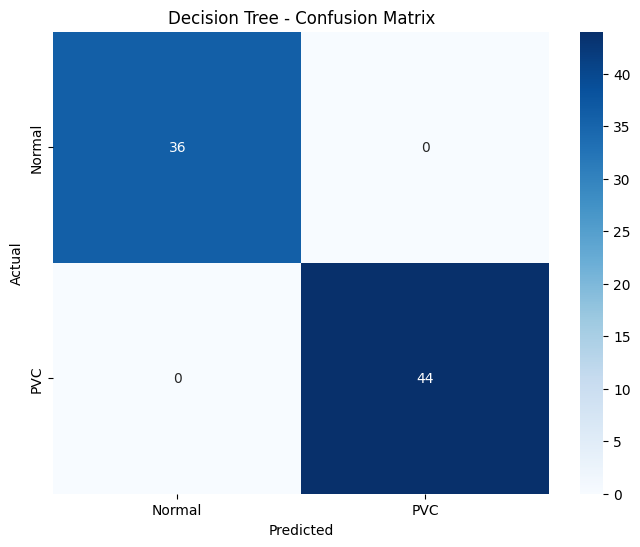

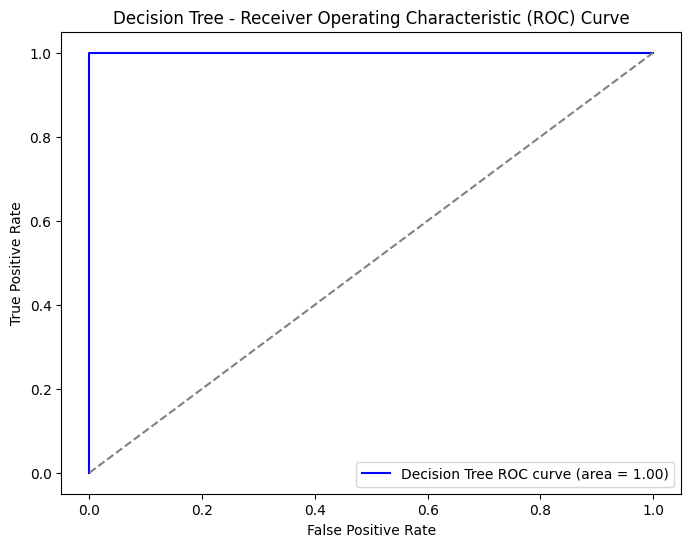

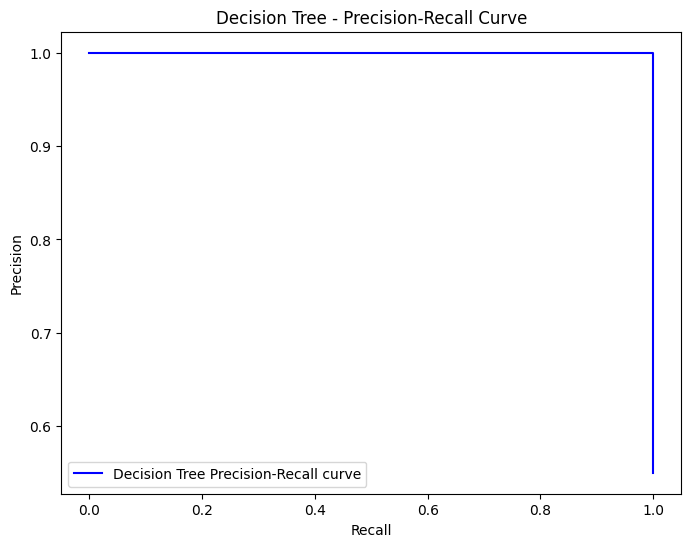

In [19]:
import numpy as np
import pandas as pd
!pip install PyWavelets
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Step 1: Load Data
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)
    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Step 2: Normalize and Filter Data
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    normalized_data = [normalize_row(row) for row in data['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    return normalized_df

def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Step 3: Visualization Functions
def plot_raw_data(data, title):
    plt.figure(figsize=(10, 6))
    for row in data.sample(n=5)['data']:  # Plot 5 random samples
        plt.plot(row)
    plt.title(f'{title} - Raw Data')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_normalized_data(data, title):
    plt.figure(figsize=(10, 6))
    for row in data.sample(n=5)['data']:  # Plot 5 random samples
        plt.plot(row)
    plt.title(f'{title} - Normalized Data')
    plt.xlabel('Time (samples)')
    plt.ylabel('Normalized Amplitude')
    plt.show()

def plot_filtered_data(data, title):
    plt.figure(figsize=(10, 6))
    for row in data.sample(n=5)['data']:  # Plot 5 random samples
        plt.plot(row)
    plt.title(f'{title} - Filtered Data')
    plt.xlabel('Time (samples)')
    plt.ylabel('Filtered Amplitude')
    plt.show()

# Step 4: Wavelet Feature Extraction
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))  # Mean of coefficients
            row_features.append(np.std(coeff))  # Standard deviation of coefficients
            row_features.append(skew(coeff))  # Skewness of coefficients
            row_features.append(kurtosis(coeff))  # Kurtosis of coefficients
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 5: Load and Process Data
fs = 360  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Load the training data for Normal and PVC classes
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with your actual file path
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with your actual file path

# Plot Raw Data
plot_raw_data(data_pvc_train, "PVC")
plot_raw_data(data_normal_train, "Normal")

# Normalize and process the data
data_pvc_train = test_normalization(data_pvc_train)
data_normal_train = test_normalization(data_normal_train)

# Plot Normalized Data
plot_normalized_data(data_pvc_train, "PVC")
plot_normalized_data(data_normal_train, "Normal")

data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)
data_normal_train = process_data(data_normal_train, fs, lowcut, highcut)

# Plot Filtered Data
plot_filtered_data(data_pvc_train, "PVC")
plot_filtered_data(data_normal_train, "Normal")

# Merge the normal and PVC data for training
data_train = pd.concat([data_pvc_train, data_normal_train], ignore_index=True)

# Step 6: Extract features using wavelet transform
X_train = extract_wavelet_features(data_train)

# Plot Feature Distributions
def plot_feature_distributions(features, title):
    plt.figure(figsize=(16, 10))
    for i, column in enumerate(features.columns[:8]):  # Plot the first 8 features
        plt.subplot(4, 2, i + 1)
        sns.histplot(features[column], kde=True, bins=30)
        plt.title(f"Feature {i+1} Distribution")
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

# Visualize Wavelet Feature Distributions
plot_feature_distributions(X_train, "Wavelet Features Distributions")


# Prepare the labels for classification
y_train = data_train['class']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 8: Model Definitions (KNN, Logistic Regression, Random Forest, SVM, Decision Tree)
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 9: Train Models, Predict, and Plot Metrics
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy and Classification Report
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'PVC'], yticklabels=['Normal', 'PVC'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=f'{model_name} Precision-Recall curve')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()
#################################################3engy

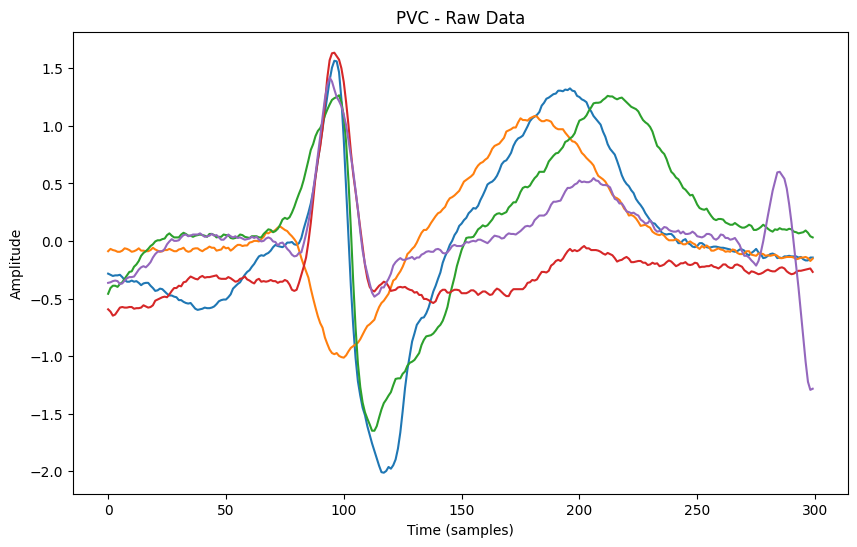

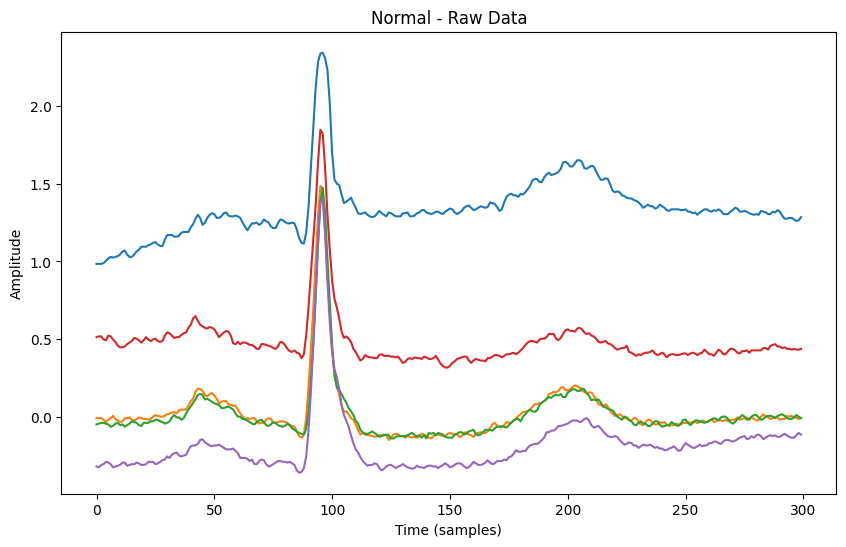

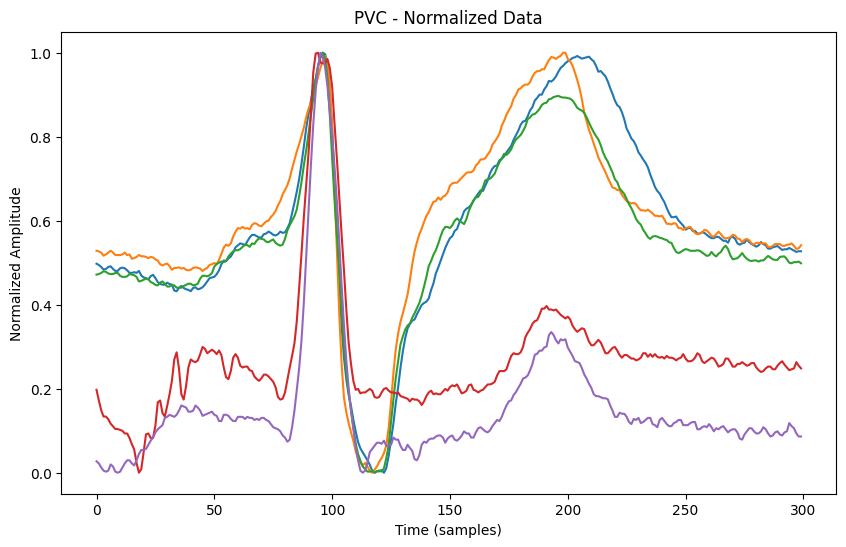

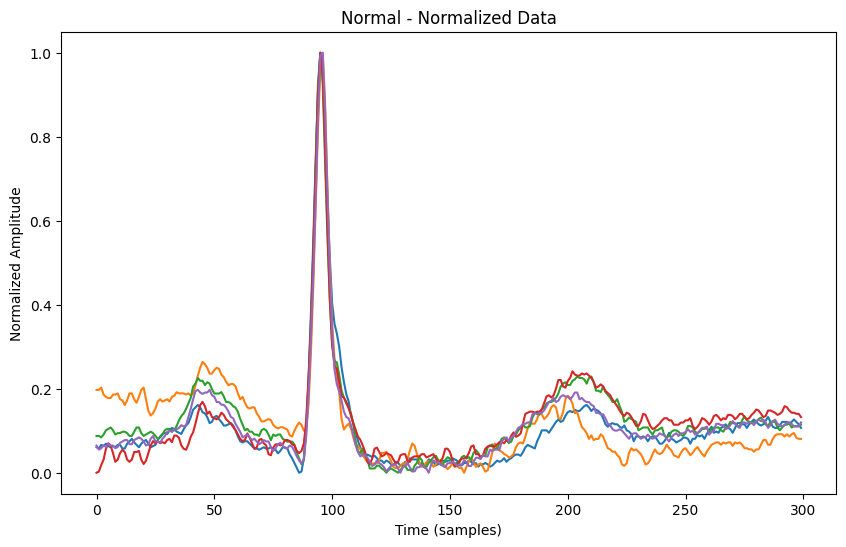

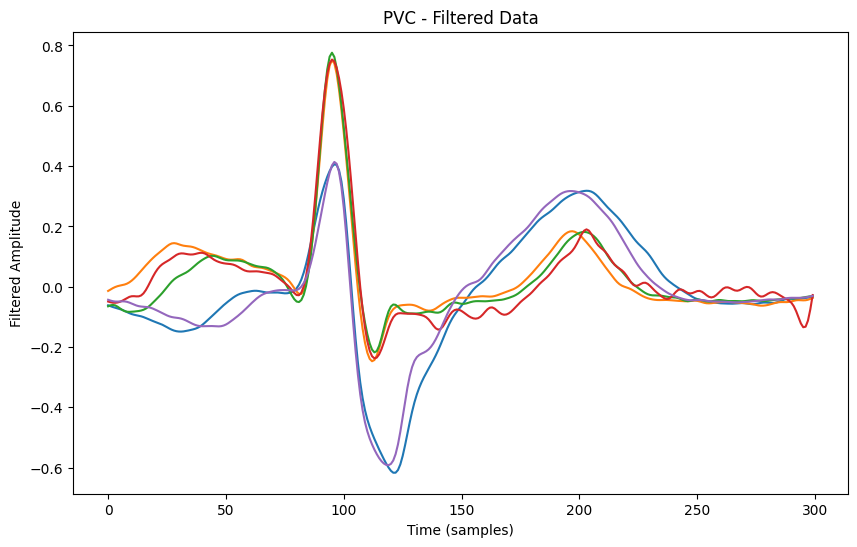

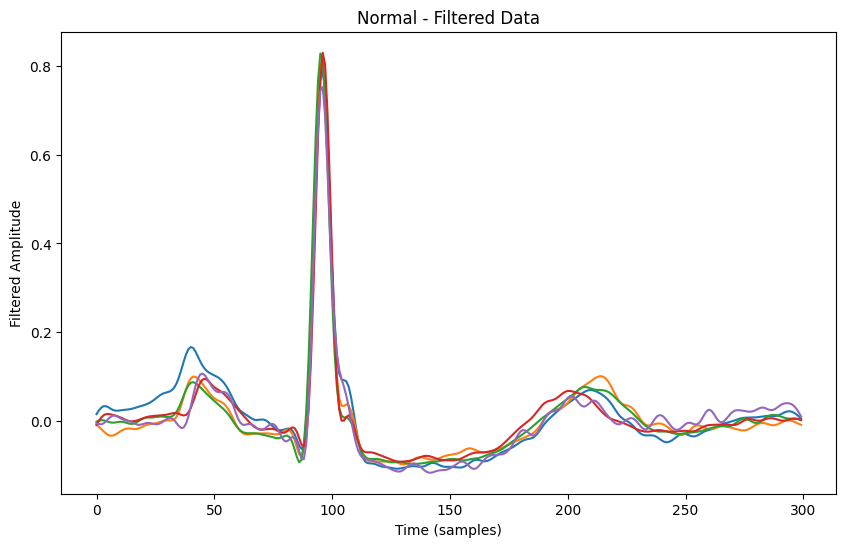

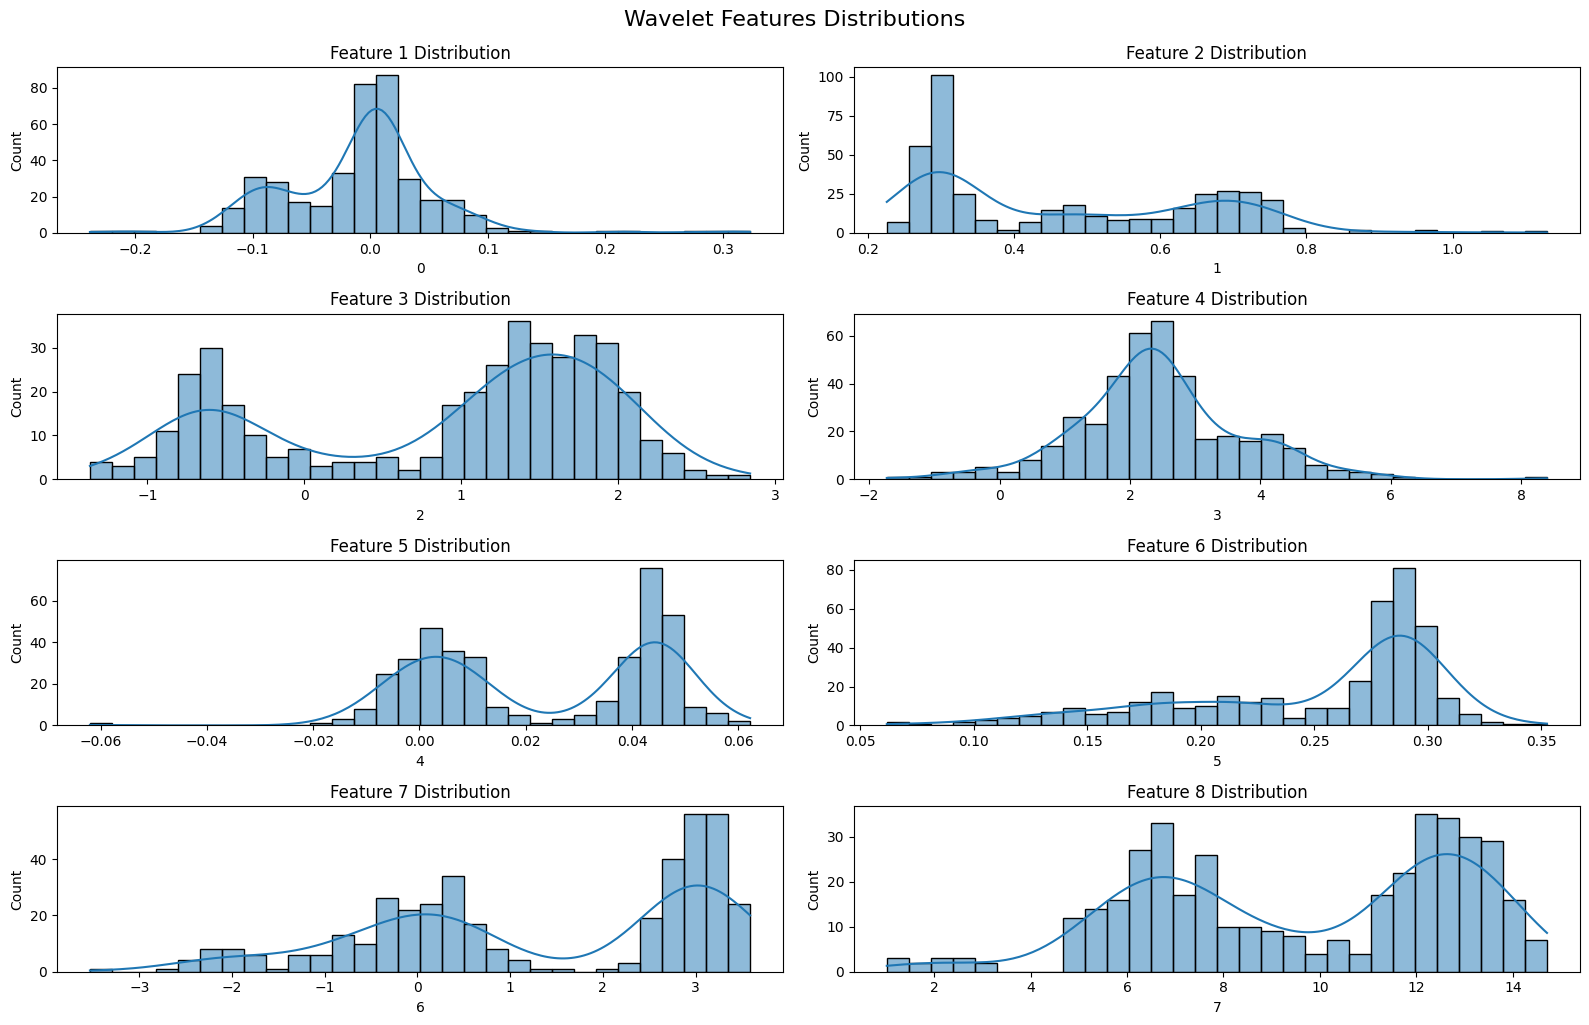

Training KNN...

KNN - Accuracy: 0.9875
KNN - Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        44

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



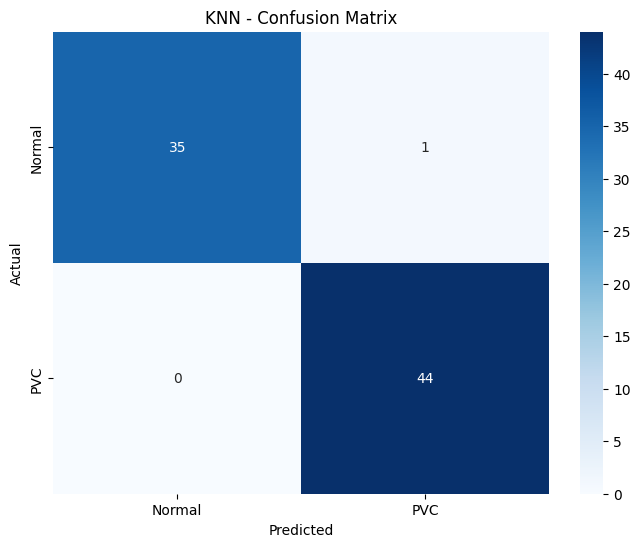

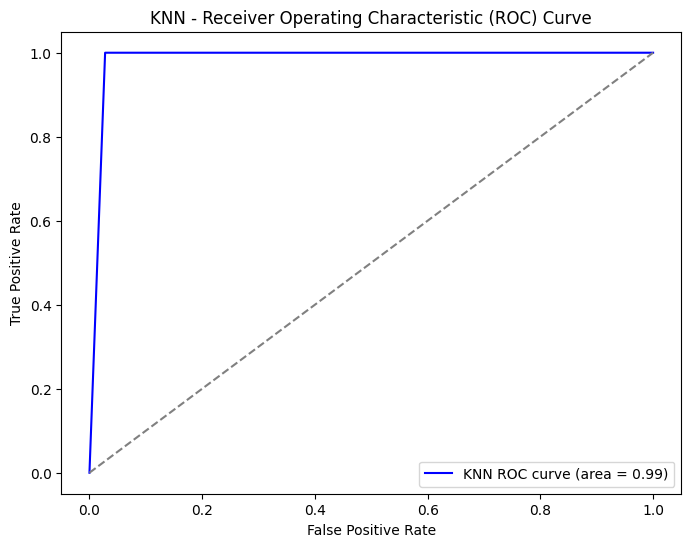

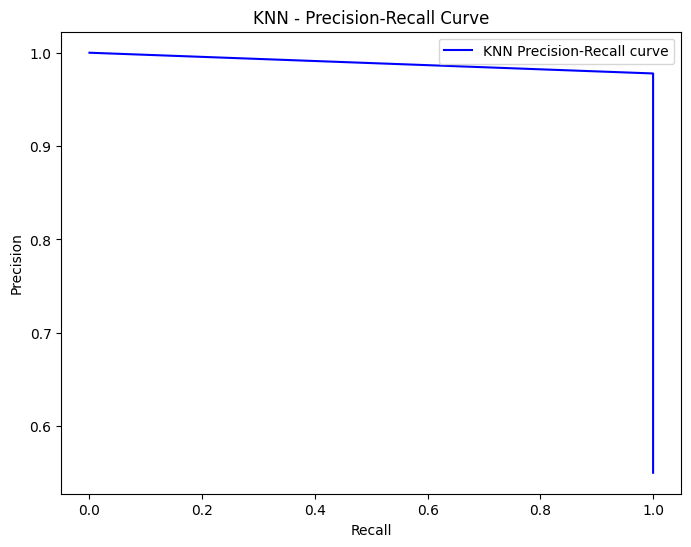

Training Logistic Regression...

Logistic Regression - Accuracy: 1.0
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



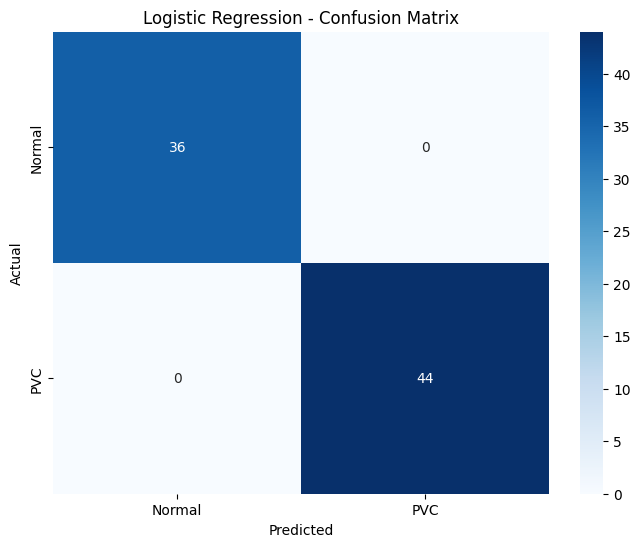

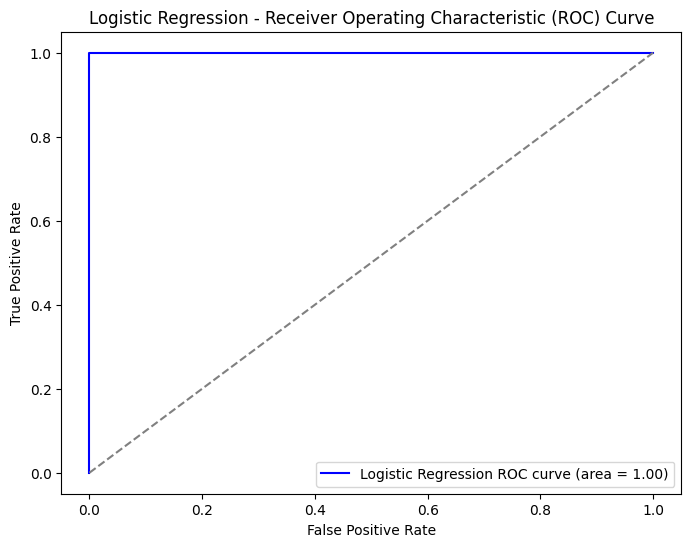

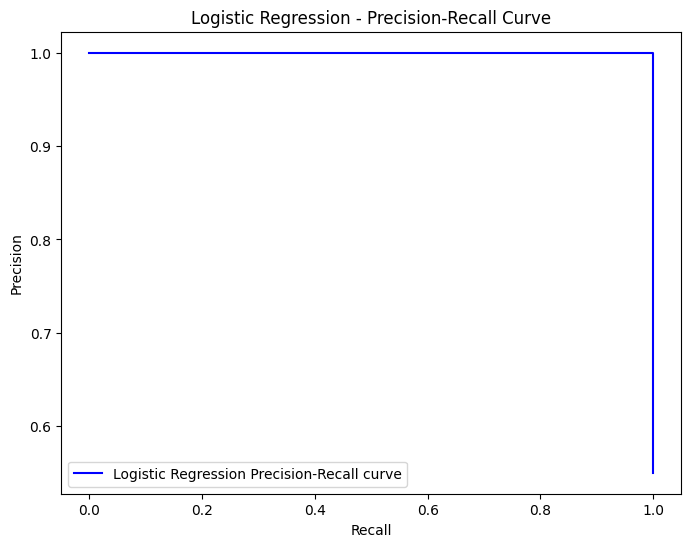

Training Random Forest...

Random Forest - Accuracy: 1.0
Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



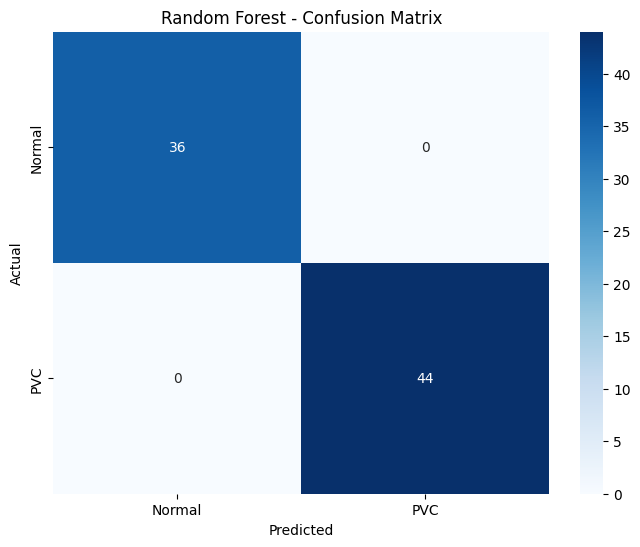

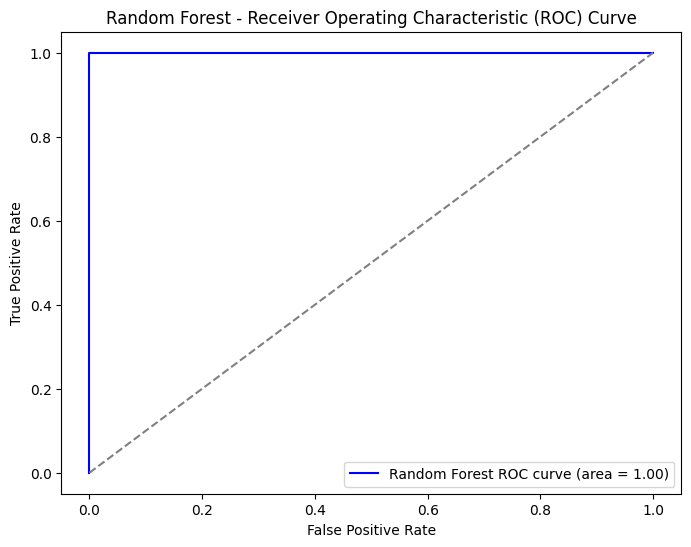

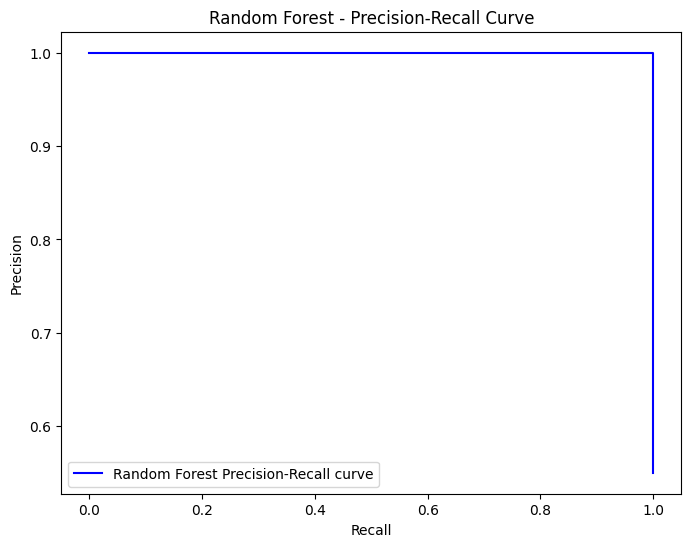

Training SVM...

SVM - Accuracy: 1.0
SVM - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



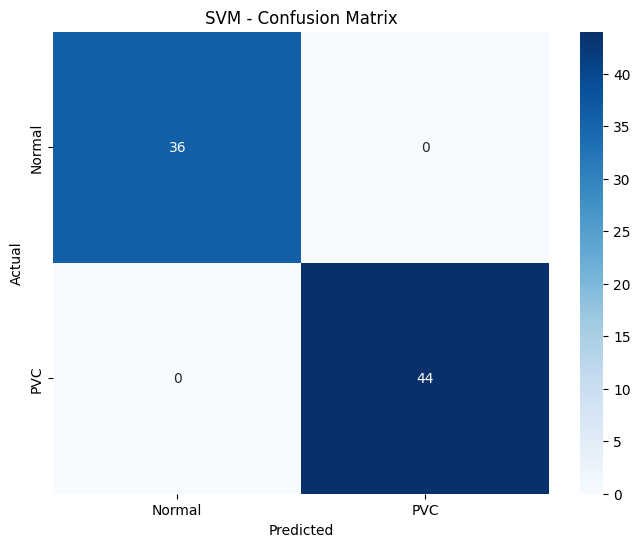

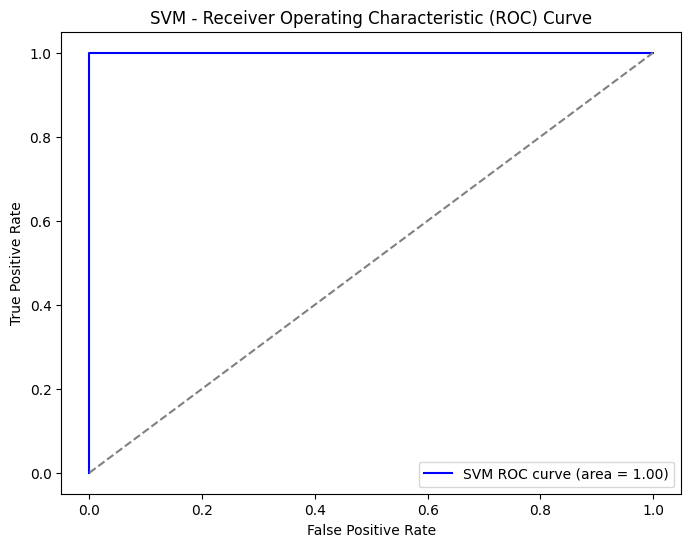

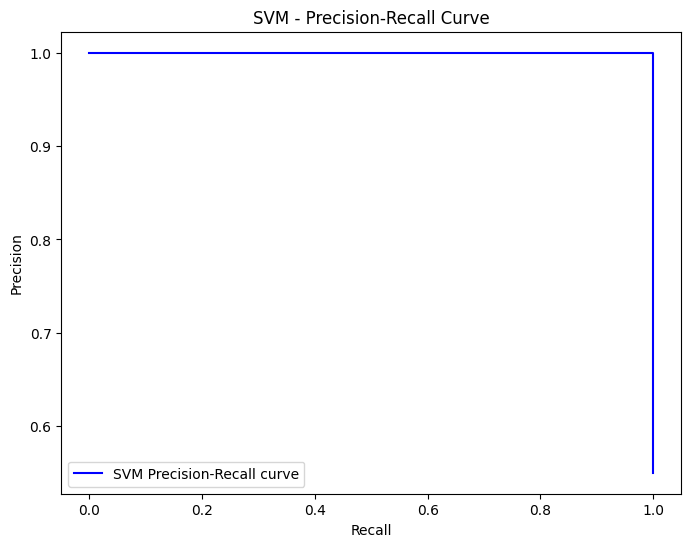

Training Decision Tree...

Decision Tree - Accuracy: 1.0
Decision Tree - Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        44

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



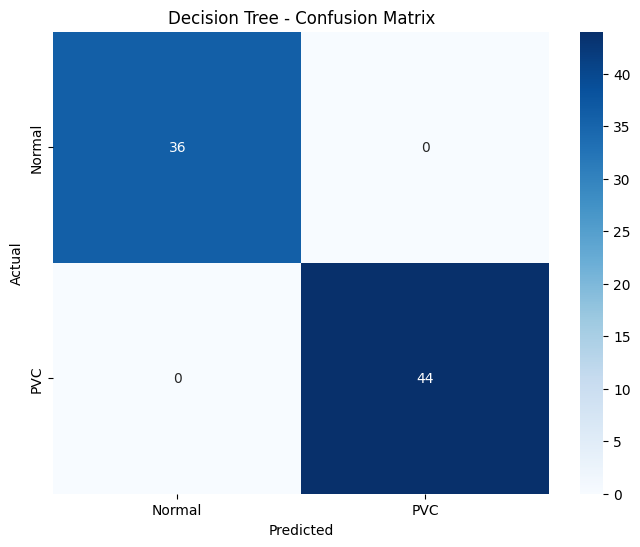

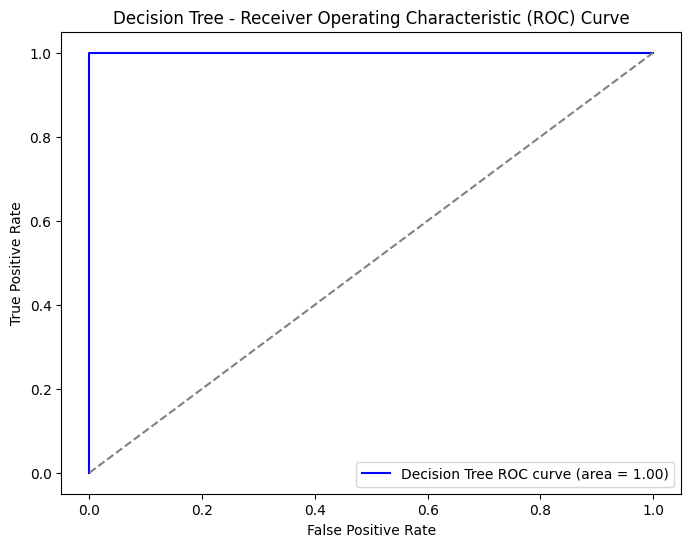

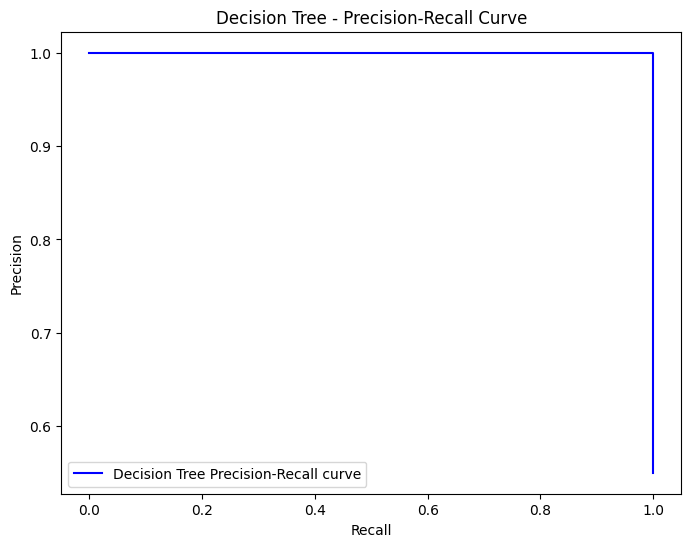

Evaluating KNN on test data...

KNN - Test Accuracy: 0.9825
KNN - Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       200
           1       1.00      0.96      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



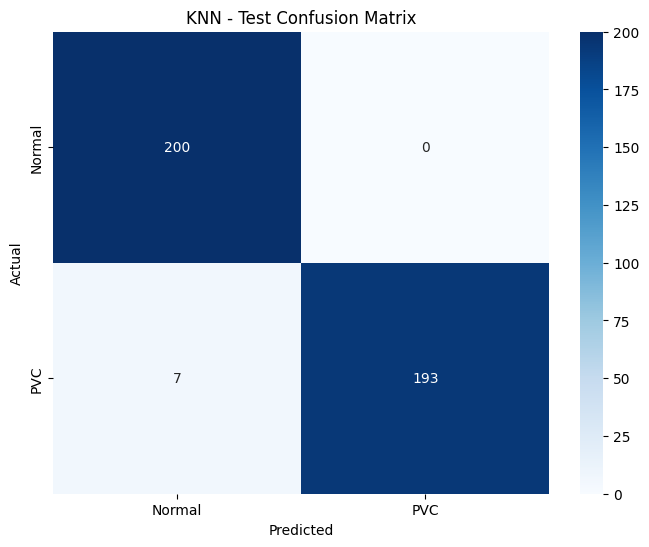

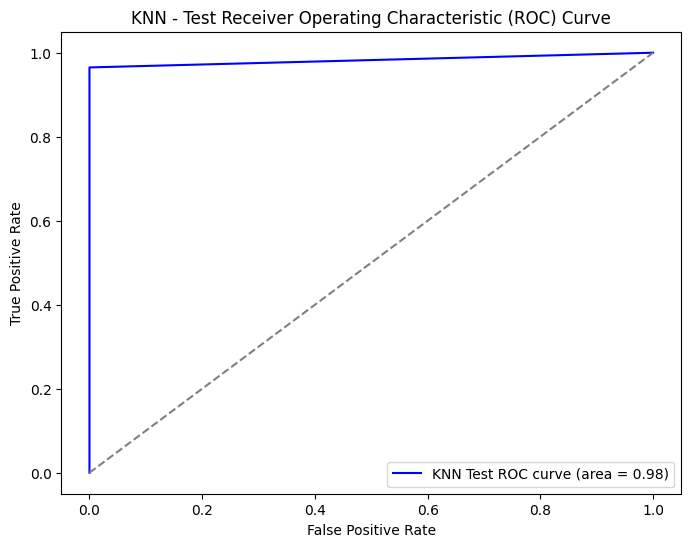

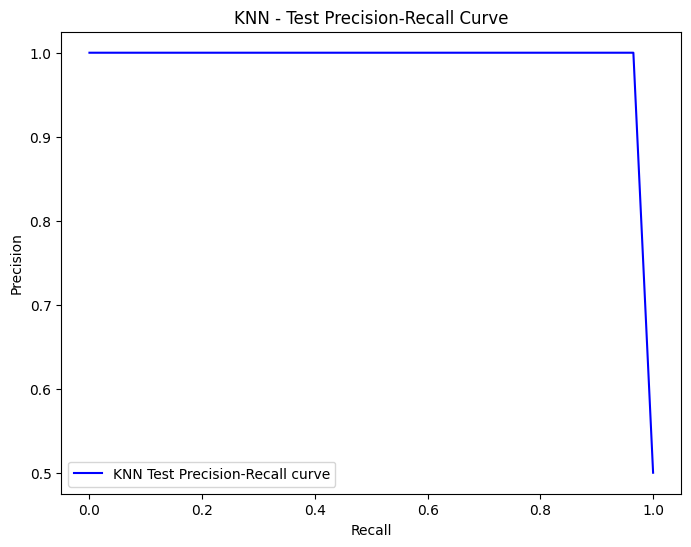

Evaluating Logistic Regression on test data...

Logistic Regression - Test Accuracy: 0.9925
Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       200
           1       1.00      0.98      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



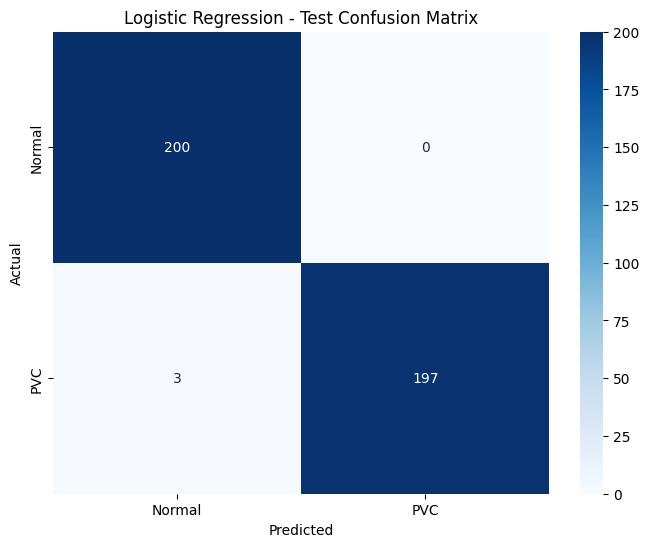

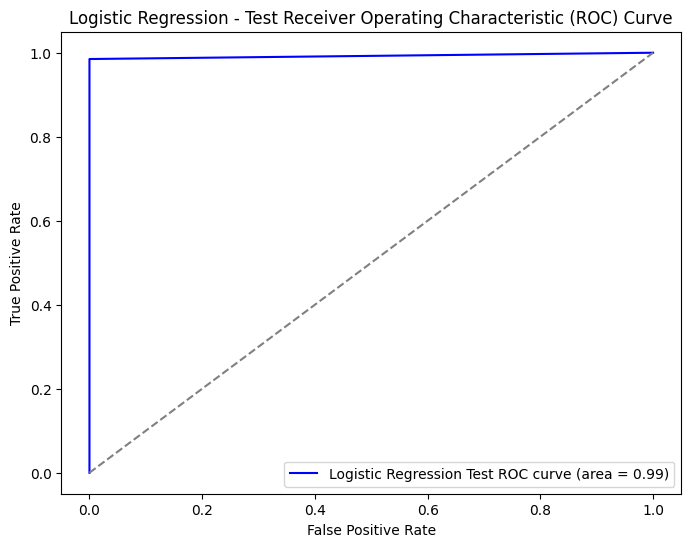

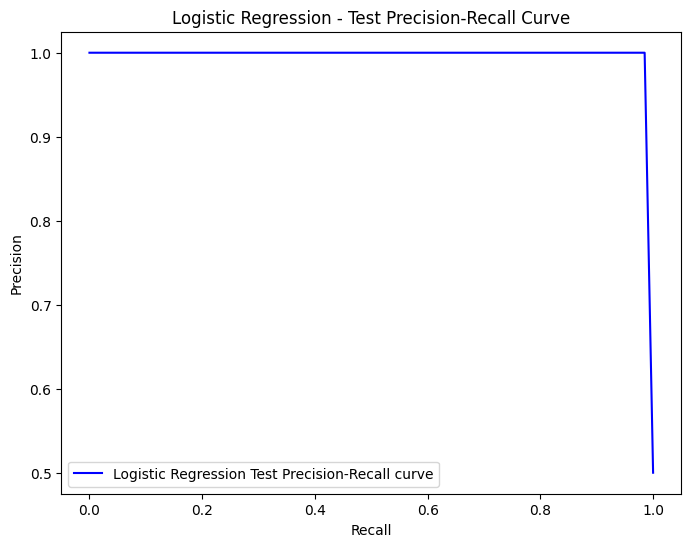

Evaluating Random Forest on test data...

Random Forest - Test Accuracy: 0.9925
Random Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       200
           1       1.00      0.98      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



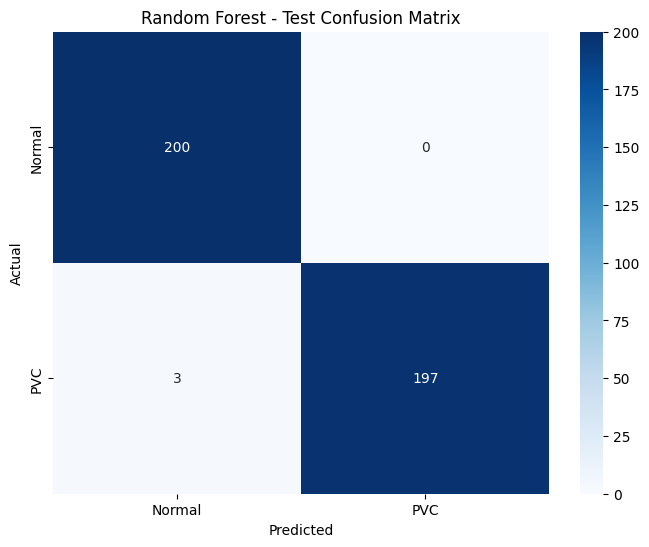

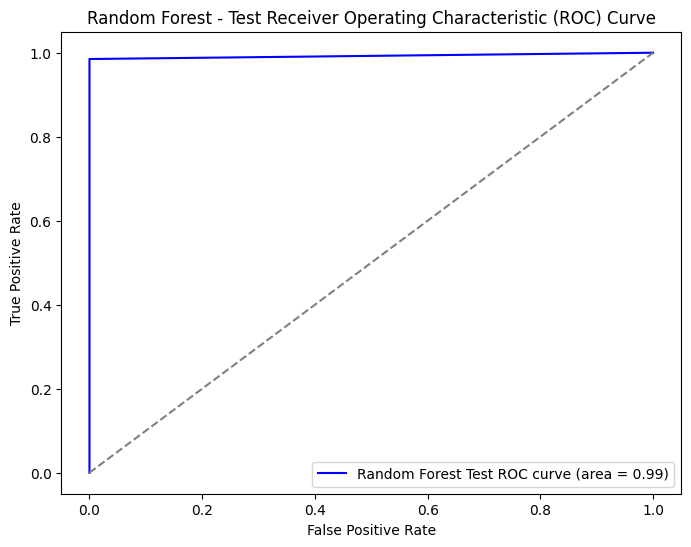

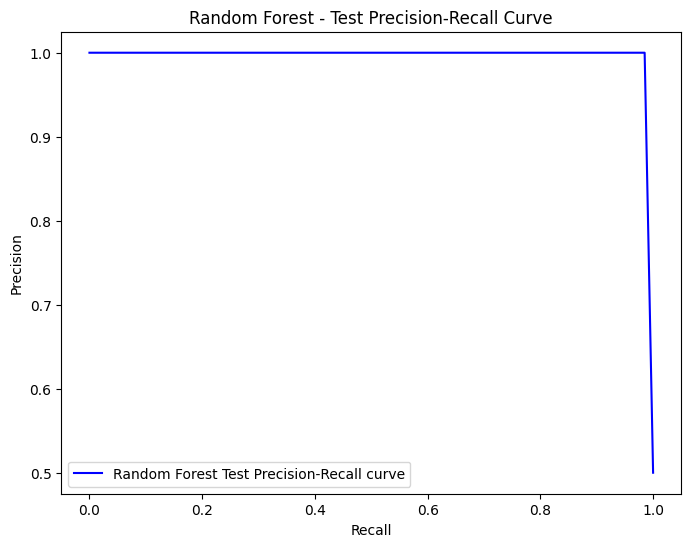

Evaluating SVM on test data...

SVM - Test Accuracy: 0.995
SVM - Test Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       200
           1       1.00      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       1.00      0.99      0.99       400
weighted avg       1.00      0.99      0.99       400



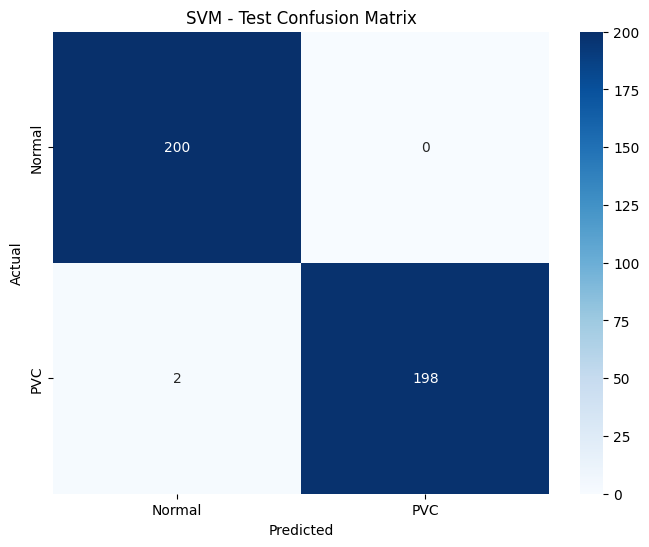

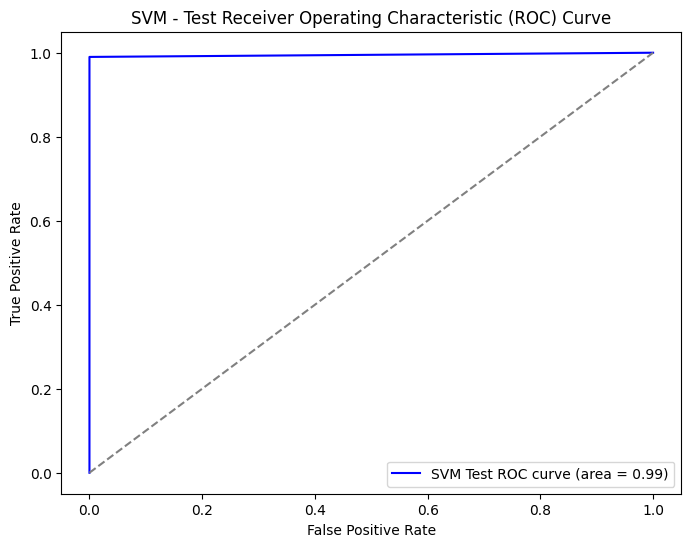

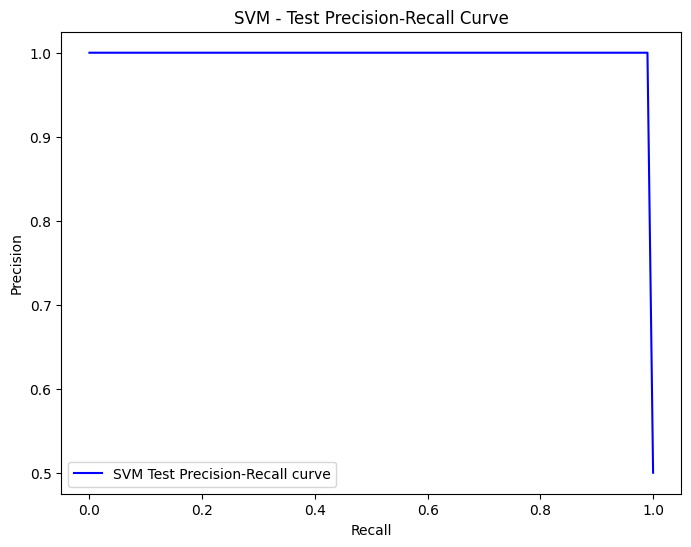

Evaluating Decision Tree on test data...

Decision Tree - Test Accuracy: 0.985
Decision Tree - Test Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       200
           1       1.00      0.97      0.98       200

    accuracy                           0.98       400
   macro avg       0.99      0.98      0.98       400
weighted avg       0.99      0.98      0.98       400



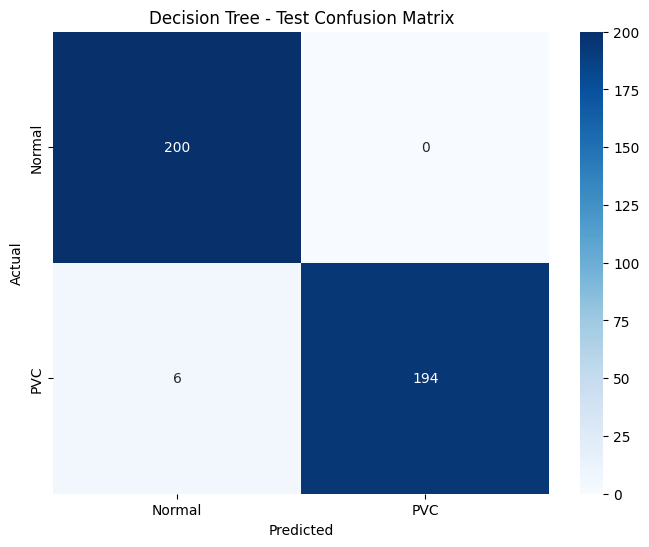

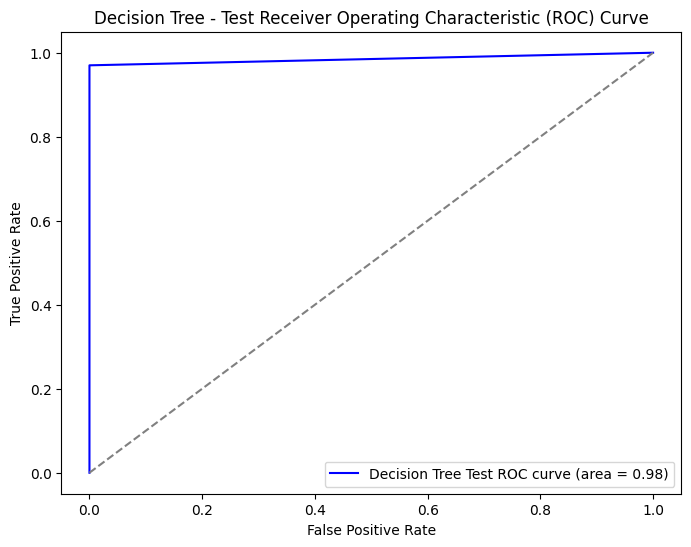

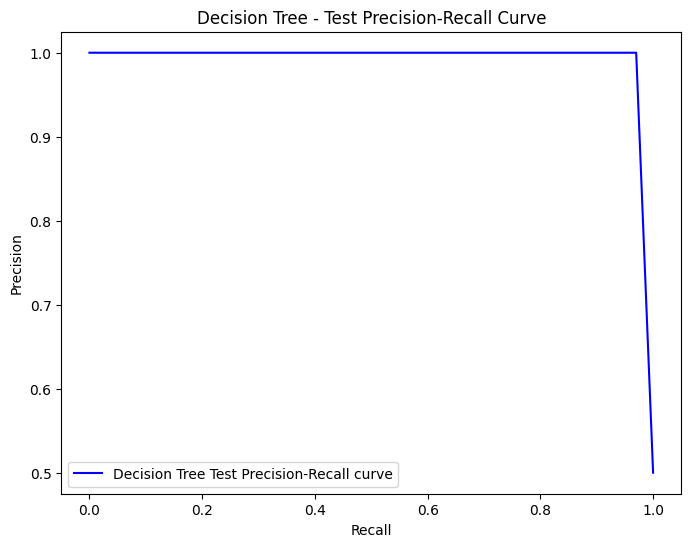

In [22]:
import numpy as np
import pandas as pd
!pip install PyWavelets
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc

# Step 1: Load Data
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)
    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Step 2: Normalize and Filter Data
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    normalized_data = [normalize_row(row) for row in data['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    return normalized_df

def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Step 3: Visualization Functions
def plot_raw_data(data, title):
    plt.figure(figsize=(10, 6))
    for row in data.sample(n=5)['data']:  # Plot 5 random samples
        plt.plot(row)
    plt.title(f'{title} - Raw Data')
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()

def plot_normalized_data(data, title):
    plt.figure(figsize=(10, 6))
    for row in data.sample(n=5)['data']:  # Plot 5 random samples
        plt.plot(row)
    plt.title(f'{title} - Normalized Data')
    plt.xlabel('Time (samples)')
    plt.ylabel('Normalized Amplitude')
    plt.show()

def plot_filtered_data(data, title):
    plt.figure(figsize=(10, 6))
    for row in data.sample(n=5)['data']:  # Plot 5 random samples
        plt.plot(row)
    plt.title(f'{title} - Filtered Data')
    plt.xlabel('Time (samples)')
    plt.ylabel('Filtered Amplitude')
    plt.show()

# Step 4: Wavelet Feature Extraction
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))  # Mean of coefficients
            row_features.append(np.std(coeff))  # Standard deviation of coefficients
            row_features.append(skew(coeff))  # Skewness of coefficients
            row_features.append(kurtosis(coeff))  # Kurtosis of coefficients
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 5: Load and Process Data
fs = 360  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Load the training data for Normal and PVC classes
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with your actual file path
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with your actual file path

# Plot Raw Data
plot_raw_data(data_pvc_train, "PVC")
plot_raw_data(data_normal_train, "Normal")

# Normalize and process the data
data_pvc_train = test_normalization(data_pvc_train)
data_normal_train = test_normalization(data_normal_train)

# Plot Normalized Data
plot_normalized_data(data_pvc_train, "PVC")
plot_normalized_data(data_normal_train, "Normal")

data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)
data_normal_train = process_data(data_normal_train, fs, lowcut, highcut)

# Plot Filtered Data
plot_filtered_data(data_pvc_train, "PVC")
plot_filtered_data(data_normal_train, "Normal")

# Merge the normal and PVC data for training
data_train = pd.concat([data_pvc_train, data_normal_train], ignore_index=True)

# Step 6: Extract features using wavelet transform
X_train = extract_wavelet_features(data_train)

# Plot Feature Distributions
def plot_feature_distributions(features, title):
    plt.figure(figsize=(16, 10))
    for i, column in enumerate(features.columns[:8]):  # Plot the first 8 features
        plt.subplot(4, 2, i + 1)
        sns.histplot(features[column], kde=True, bins=30)
        plt.title(f"Feature {i+1} Distribution")
    plt.tight_layout()
    plt.suptitle(title, y=1.02, fontsize=16)
    plt.show()

# Visualize Wavelet Feature Distributions
plot_feature_distributions(X_train, "Wavelet Features Distributions")

# Prepare the labels for classification
y_train = data_train['class']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 8: Model Definitions (KNN, Logistic Regression, Random Forest, SVM, Decision Tree)
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

# Step 9: Train Models, Predict, and Plot Metrics
for model_name, model in models.items():
    print(f"Training {model_name}...")

    # Train model
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Accuracy and Classification Report
    print(f"\n{model_name} - Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} - Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'PVC'], yticklabels=['Normal', 'PVC'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'{model_name} ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=f'{model_name} Precision-Recall curve')
    plt.title(f'{model_name} - Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()

# Step 10: Load and Process Test Data
# Load the test data for Normal and PVC classes
data_pvc_test = read_data('PVC_Test.txt', 1)  # Replace with your actual file path
data_normal_test = read_data('Normal_Test.txt', 0)  # Replace with your actual file path

# Normalize and process the test data
data_pvc_test = test_normalization(data_pvc_test)
data_normal_test = test_normalization(data_normal_test)

data_pvc_test = process_data(data_pvc_test, fs, lowcut, highcut)
data_normal_test = process_data(data_normal_test, fs, lowcut, highcut)

# Merge the normal and PVC data for testing
data_test = pd.concat([data_pvc_test, data_normal_test], ignore_index=True)

# Extract features from the test data using wavelet transform
X_test = extract_wavelet_features(data_test)

# Prepare the labels for test data
y_test = data_test['class']

# Step 11: Evaluate Models on Test Data
for model_name, model in models.items():
    print(f"Evaluating {model_name} on test data...")

    # Predict on test data
    y_pred = model.predict(X_test)

    # Accuracy and Classification Report
    print(f"\n{model_name} - Test Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"{model_name} - Test Classification Report:")
    print(classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'PVC'], yticklabels=['Normal', 'PVC'])
    plt.title(f'{model_name} - Test Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='b', label=f'{model_name} Test ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title(f'{model_name} - Test Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='best')
    plt.show()

    # Precision-Recall Curve
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='b', label=f'{model_name} Test Precision-Recall curve')
    plt.title(f'{model_name} - Test Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='best')
    plt.show()
####################review##########################

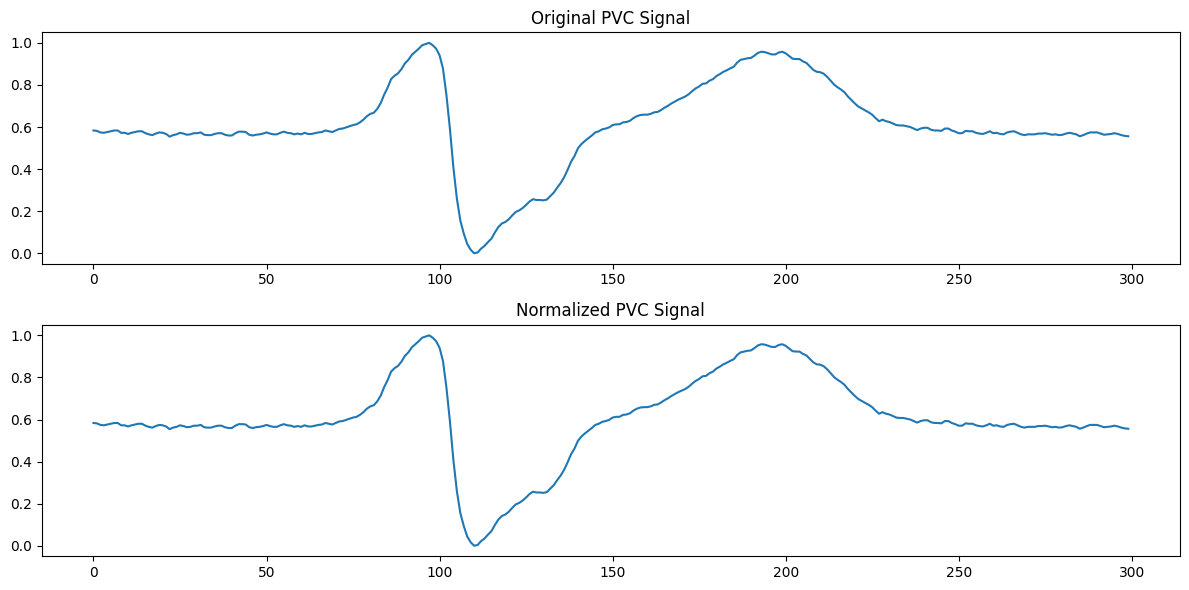

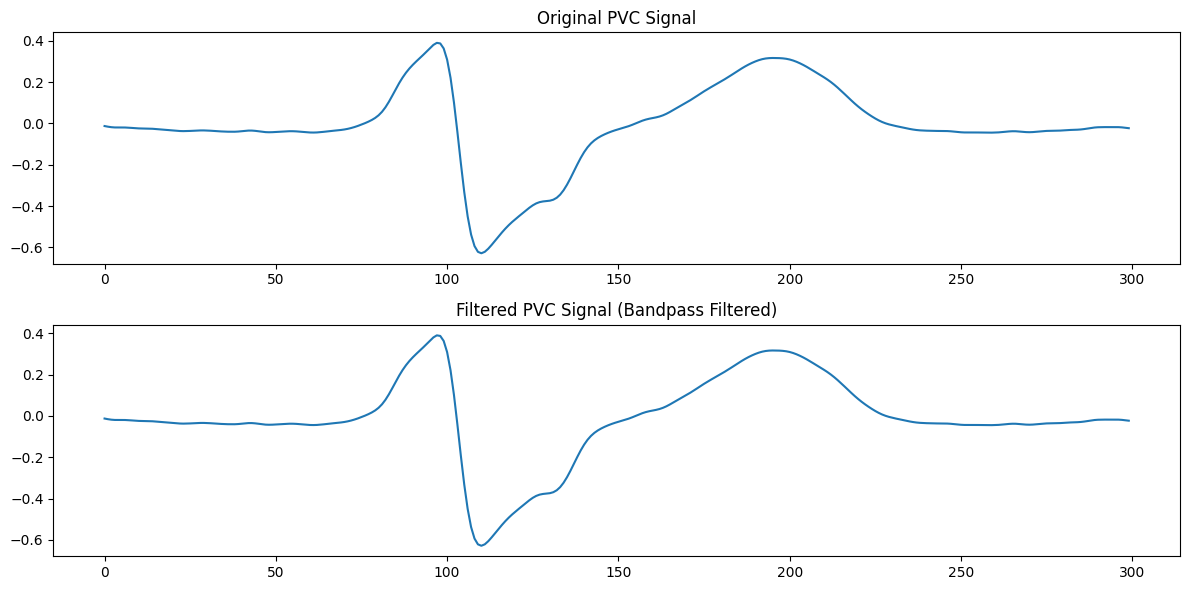

Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        44

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



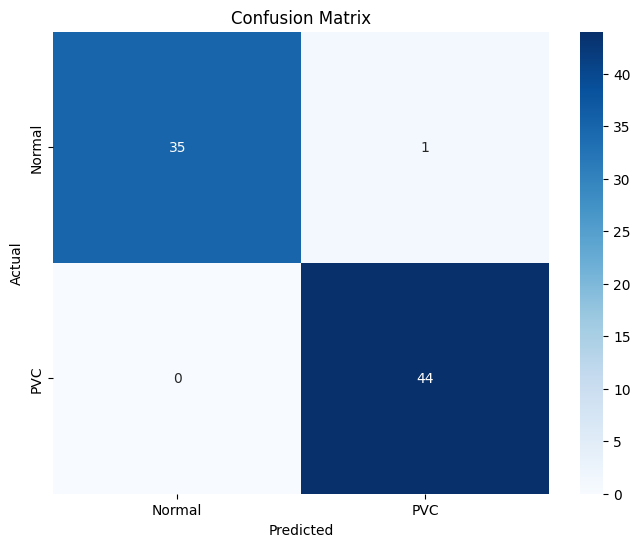

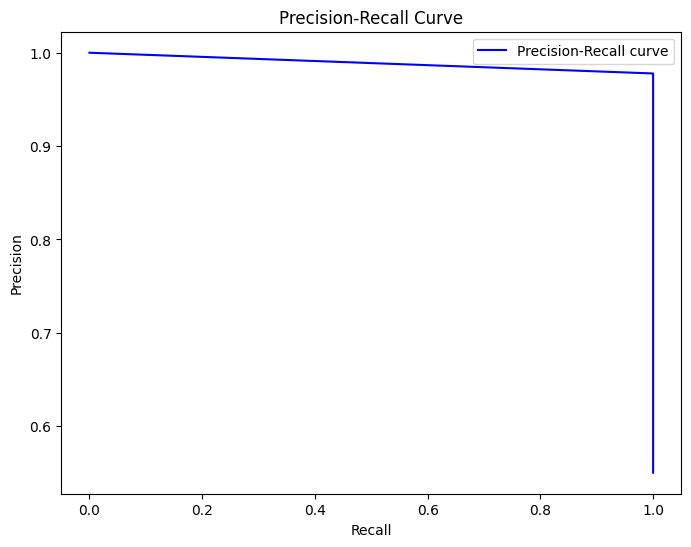

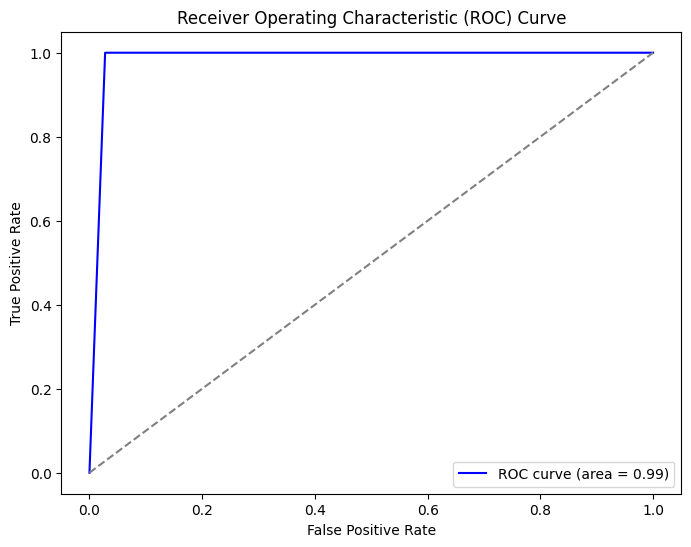

In [10]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 1: Load Data
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            # Split the line into values, filter out empty strings, and convert to floats
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)

    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Step 2: Normalize Data
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    normalized_data = [normalize_row(row) for row in data['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    return normalized_df

# Step 3: Bandpass Filtering (Butterworth)
def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Step 4: Feature Extraction using Wavelets
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))          # Mean of coefficients
            row_features.append(np.std(coeff))           # Standard deviation of coefficients
            row_features.append(skew(coeff))             # Skewness of coefficients
            row_features.append(kurtosis(coeff))         # Kurtosis of coefficients
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 5: Load and Process the Data
fs = 360  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Load the training data for Normal and PVC classes
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with your actual file path
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with your actual file path

# Normalize the data
data_pvc_train = test_normalization(data_pvc_train)
data_normal_train = test_normalization(data_normal_train)

# Plot original and normalized data for the first signal (PVC)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_pvc_train['data'][0], label='Original PVC Signal')
plt.title("Original PVC Signal")
plt.subplot(2, 1, 2)
plt.plot(data_pvc_train['data'][0], label='Normalized PVC Signal')
plt.title("Normalized PVC Signal")
plt.tight_layout()
plt.show()

# Process the data (apply bandpass filter)
data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)
data_normal_train = process_data(data_normal_train, fs, lowcut, highcut)

# Plot the original and filtered data for the first signal (PVC)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_pvc_train['data'][0], label='Original PVC Signal')
plt.title("Original PVC Signal")
plt.subplot(2, 1, 2)
plt.plot(data_pvc_train['data'][0], label='Filtered PVC Signal')
plt.title("Filtered PVC Signal (Bandpass Filtered)")
plt.tight_layout()
plt.show()

# Merge the normal and PVC data for training
data_train = pd.concat([data_pvc_train, data_normal_train], ignore_index=True)

# Extract features using wavelet transform
X_train = extract_wavelet_features(data_train)

# Step 6: Prepare the labels for classification
y_train = data_train['class']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 8: Classification using KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 9: Evaluation
y_pred = knn.predict(X_test)

# Accuracy and Classification Report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'PVC'], yticklabels=['Normal', 'PVC'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Optional: Plot Precision-Recall Curve or ROC Curve
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='b', label='Precision-Recall curve')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend(loc='best')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()


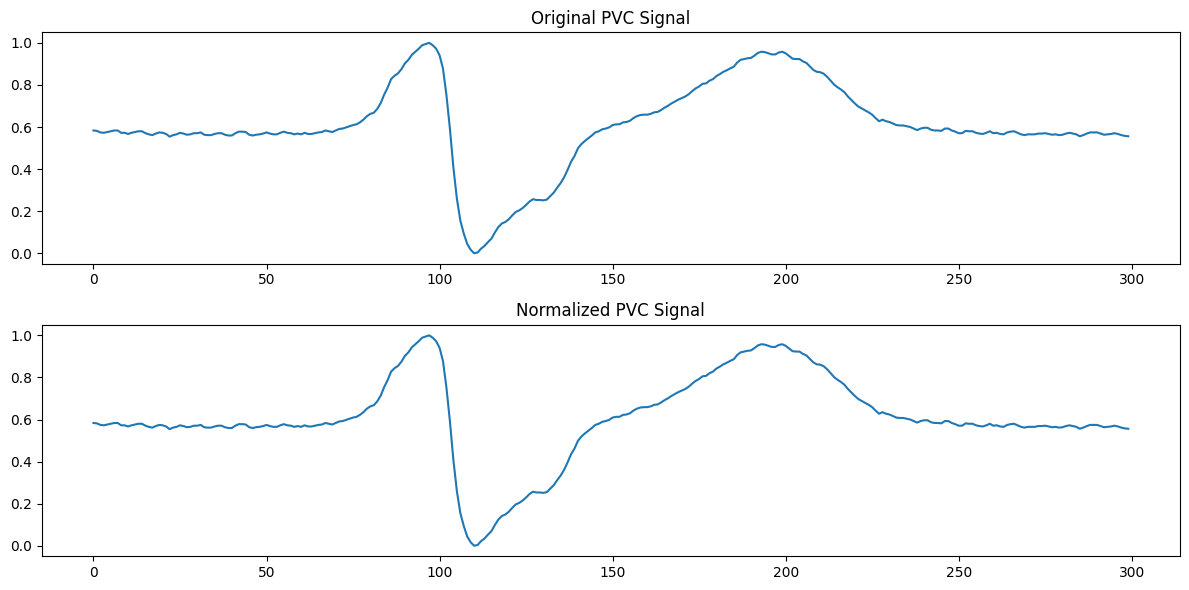

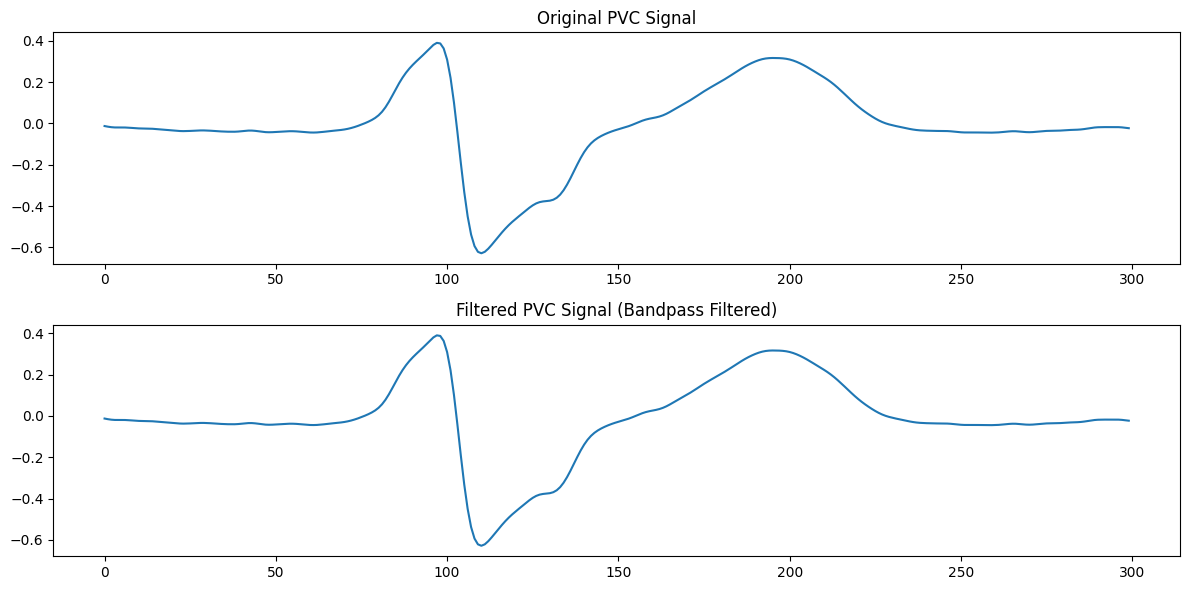

Accuracy: 0.9875
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        36
           1       0.98      1.00      0.99        44

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [12]:
import numpy as np
import pandas as pd
import pywt
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Data
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            # Split the line into values, filter out empty strings, and convert to floats
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)

    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Step 2: Normalize Data
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    normalized_data = [normalize_row(row) for row in data['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    return normalized_df

# Step 3: Bandpass Filtering (Butterworth)
def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Step 4: Feature Extraction using Wavelets
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))          # Mean of coefficients
            row_features.append(np.std(coeff))           # Standard deviation of coefficients
            row_features.append(skew(coeff))             # Skewness of coefficients
            row_features.append(kurtosis(coeff))         # Kurtosis of coefficients
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 5: Load and Process the Data
fs = 360  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Load the training data for Normal and PVC classes
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with your actual file path
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with your actual file path

# Normalize the data
data_pvc_train = test_normalization(data_pvc_train)
data_normal_train = test_normalization(data_normal_train)

# Plot original and normalized data for the first signal (PVC)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_pvc_train['data'][0], label='Original PVC Signal')
plt.title("Original PVC Signal")
plt.subplot(2, 1, 2)
plt.plot(data_pvc_train['data'][0], label='Normalized PVC Signal')
plt.title("Normalized PVC Signal")
plt.tight_layout()
plt.show()

# Process the data (apply bandpass filter)
data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)
data_normal_train = process_data(data_normal_train, fs, lowcut, highcut)

# Plot the original and filtered data for the first signal (PVC)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(data_pvc_train['data'][0], label='Original PVC Signal')
plt.title("Original PVC Signal")
plt.subplot(2, 1, 2)
plt.plot(data_pvc_train['data'][0], label='Filtered PVC Signal')
plt.title("Filtered PVC Signal (Bandpass Filtered)")
plt.tight_layout()
plt.show()

# Merge the normal and PVC data for training
data_train = pd.concat([data_pvc_train, data_normal_train], ignore_index=True)

# Extract features using wavelet transform
X_train = extract_wavelet_features(data_train)

# Step 6: Prepare the labels for classification
y_train = data_train['class']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 8: Classification using KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 9: Evaluation
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



In [ ]:
import numpy as np
import pandas as pd
import pywt
from scipy.signal import butter, filtfilt
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Load Data
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            # Split the line into values, filter out empty strings, and convert to floats
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)

    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Step 2: Normalize Data
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def test_normalization(data):
    normalized_data = [normalize_row(row) for row in data['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': data['class']})
    return normalized_df

# Step 3: Bandpass Filtering (Butterworth)
def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Step 4: Feature Extraction using Wavelets
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))          # Mean of coefficients
            row_features.append(np.std(coeff))           # Standard deviation of coefficients
            row_features.append(skew(coeff))             # Skewness of coefficients
            row_features.append(kurtosis(coeff))         # Kurtosis of coefficients
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 5: Load and Process the Data
fs = 300  # Sampling frequency in Hz
lowcut = 0.5  # Lower cutoff frequency in Hz
highcut = 40  # Upper cutoff frequency in Hz

# Load the training data for Normal and PVC classes
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with your actual file path
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with your actual file path

# Normalize the data
data_pvc_train = test_normalization(data_pvc_train)
data_normal_train = test_normalization(data_normal_train)

# Process the data (apply bandpass filter)
data_pvc_train = process_data(data_pvc_train, fs, lowcut, highcut)
data_normal_train = process_data(data_normal_train, fs, lowcut, highcut)

# Merge the normal and PVC data for training
data_train = pd.concat([data_pvc_train, data_normal_train], ignore_index=True)

# Extract features using wavelet transform
X_train = extract_wavelet_features(data_train)

# Step 6: Prepare the labels for classification
y_train = data_train['class']

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Step 8: Classification using KNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Step 9: Evaluation
y_pred = knn.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))



In [ ]:
import numpy as np
import pandas as pd
import pywt
from scipy.signal import butter, filtfilt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import skew, kurtosis

# Step 1: Reading the ECG data
def read_data(path, classification):
    data = []
    with open(path, "r") as file:
        for line in file:
            row = [float(value) for value in line.strip().split('|') if value.strip()]
            data.append(row)
    df = pd.DataFrame({'data': data})
    df['class'] = classification
    return df

# Merge two dataframes
def merge(data1, data2):
    return pd.concat([data1, data2], ignore_index=True)

# Normalize the signal data
def normalize_row(row, range_min=0, range_max=1):
    min_val = np.min(row)
    max_val = np.max(row)
    return [(range_max - range_min) * (x - min_val) / (max_val - min_val) + range_min for x in row]

def normalize_data(df):
    normalized_data = [normalize_row(row) for row in df['data']]
    normalized_df = pd.DataFrame({'data': normalized_data, 'class': df['class']})
    return normalized_df

# Design the bandpass filter (0.5 to 40 Hz)
def design_bandpass_filter(lowcut, highcut, fs, order=4):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

# Apply the bandpass filter to the signal
def apply_bandpass_filter(signal, b, a):
    return filtfilt(b, a, signal)

# Process the data by filtering
def process_data(df, fs, lowcut, highcut):
    b, a = design_bandpass_filter(lowcut, highcut, fs)
    filtered_data = df['data'].apply(lambda x: apply_bandpass_filter(x, b, a))
    df['data'] = filtered_data
    return df

# Feature extraction using Wavelet Transform
def extract_wavelet_features(df, wavelet='db4', level=4):
    features = []
    for row in df['data']:
        coeffs = pywt.wavedec(row, wavelet, level=level)
        row_features = []
        for coeff in coeffs:
            row_features.append(np.mean(coeff))
            row_features.append(np.std(coeff))
            row_features.append(skew(coeff))
            row_features.append(kurtosis(coeff))
        features.append(row_features)
    feature_df = pd.DataFrame(features)
    return feature_df

# Step 2: Preparing the Data
fs = 360  # Sampling frequency (Hz)
lowcut = 0.5  # Lower cutoff frequency (Hz)
highcut = 40  # Upper cutoff frequency (Hz)

# Read and preprocess the data
data_pvc_train = read_data('PVC_Train.txt', 1)  # Replace with the actual file path for PVC data
data_normal_train = read_data('Normal_Train.txt', 0)  # Replace with the actual file path for Normal data

# Merge the two datasets (Normal and PVC)
data = merge(data_pvc_train, data_normal_train)

# Normalize the data
data = normalize_data(data)

# Filter the data
data = process_data(data, fs, lowcut, highcut)

# Feature extraction using wavelets
features = extract_wavelet_features(data)

# Step 3: Prepare the dataset for classification
X = features
y = data['class']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (important for KNN and other distance-based classifiers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Step 5: Predict and evaluate the model
y_pred = knn.predict(X_test_scaled)

# Display accuracy and classification report
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Classification Report:")
print(classification_report(y_test, y_pred))
